In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
from PIL import Image

## misc

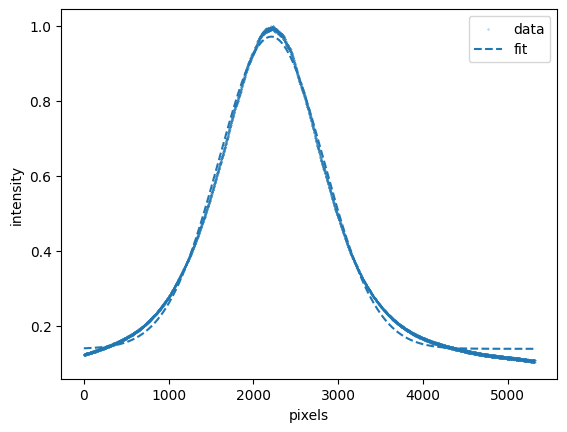

x waist = 3378.50 microns


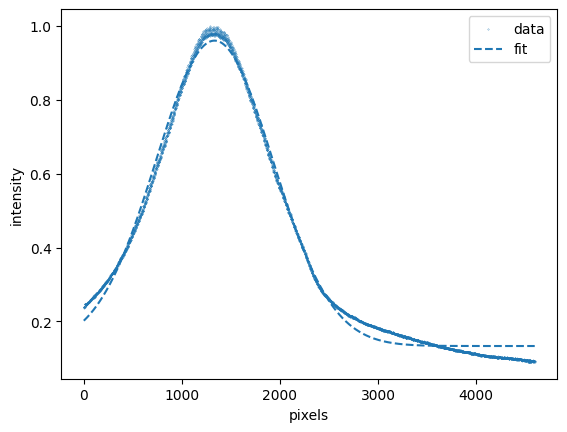

y waist = 3272.37 microns


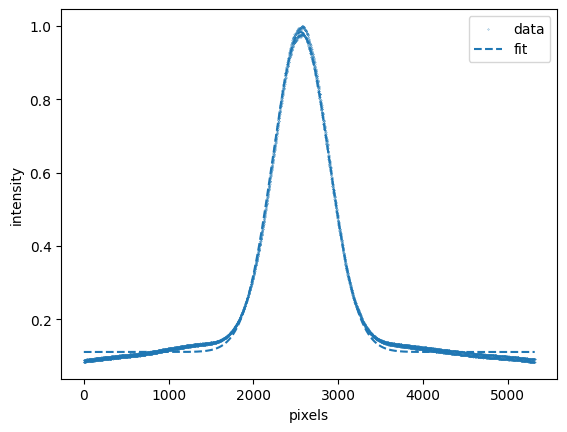

x waist = 1819.99 microns


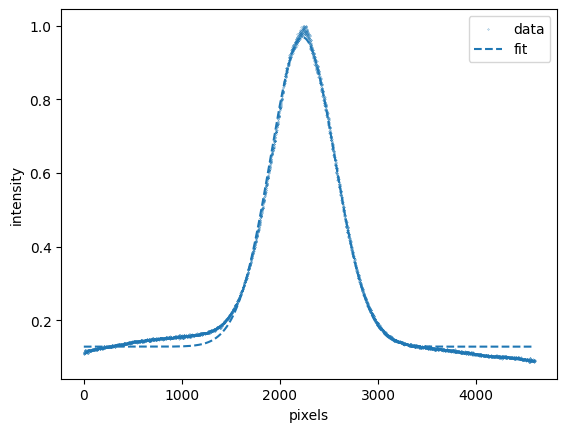

y waist = 1811.41 microns


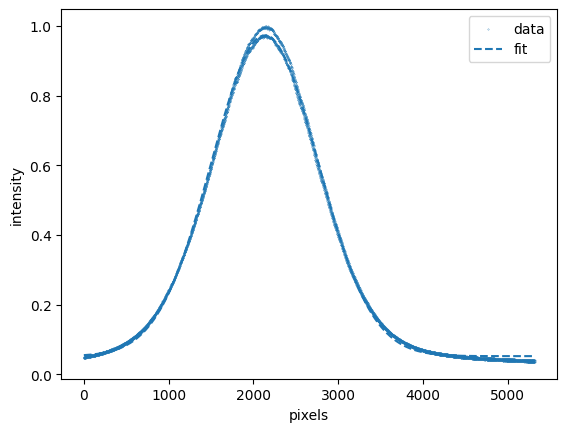

x waist = 3439.40 microns


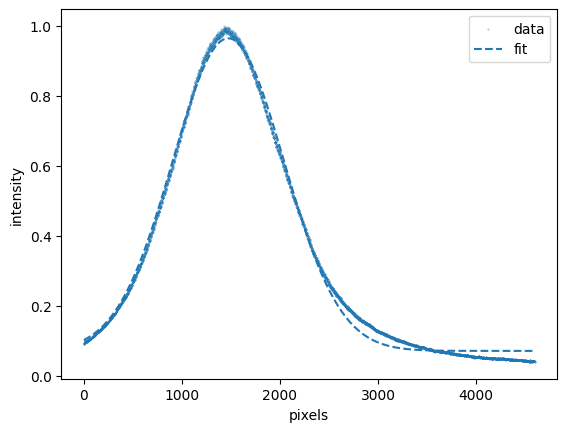

y waist = 3114.19 microns


In [58]:
# um_per_pixel = 3.45 # for BFS-U3-122S6M-C
um_per_pixel = 2.74 


files = ['C40-780PM_APC sensor.bmp', 'C40-LMA_APC sensor.bmp', 'C40-OZ_APC sensor.bmp']

xwaists = []
ywaists = []

for file in files:
    img = Image.open(os.path.join('data','misc',file))
    rows = np.array(img, dtype=float)
    
    xproj = np.sum(rows, axis=0)
    xproj /= max(xproj)
    yproj = np.sum(rows, axis=1)
    yproj /= max(yproj)
    
    xpts = np.arange(len(xproj))
    ypts = np.arange(len(yproj))
    
    gaussian_beam = lambda x, x0, w0, a, b: a*np.exp(-2*(x-x0)**2/w0**2) + b
    
    # x fit
    bounds = [
        [xpts[0], 50,  0.7, 0], # mins
        [xpts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=xpts, ydata=xproj, bounds=bounds)
    
    plt.scatter(xpts, xproj,label='data', s=0.05)
    plt.plot(xpts, gaussian_beam(xpts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()

    wx = popt[1]*um_per_pixel
    xwaists.append(wx)
    print(f"x waist = {wx:.2f} microns")
    
    # y fit
    bounds = [
        [ypts[0], 50,  0.7, 0], # mins
        [ypts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=ypts, ydata=yproj, bounds=bounds)
    
    plt.scatter(ypts, yproj,label='data',s=0.05)
    plt.plot(ypts, gaussian_beam(ypts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()
    wy = popt[1]*um_per_pixel
    ywaists.append(wy)
    print(f"y waist = {wy:.2f} microns")

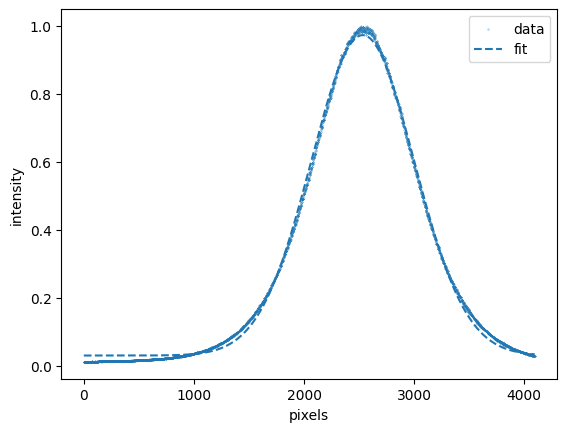

x waist = 3229.68 microns


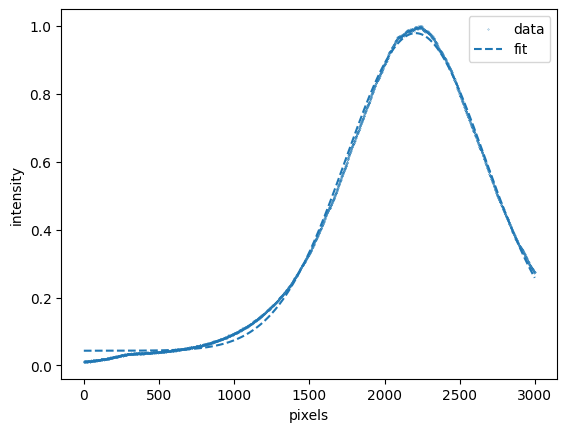

y waist = 3187.38 microns


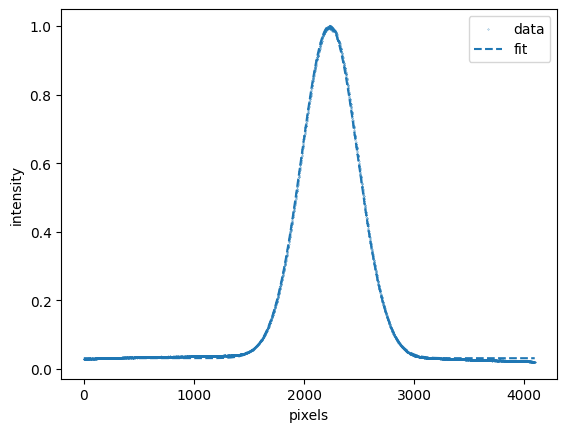

x waist = 1766.88 microns


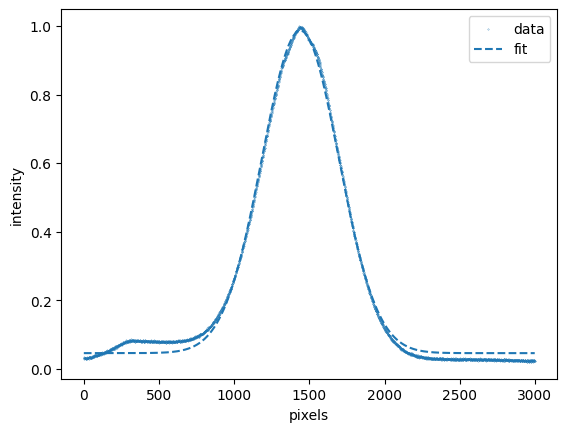

y waist = 1758.99 microns


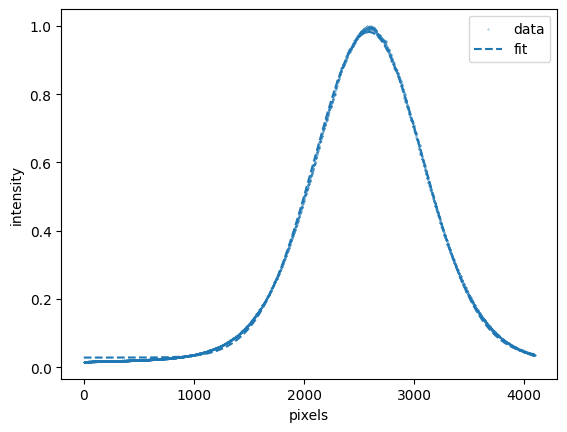

x waist = 3423.14 microns


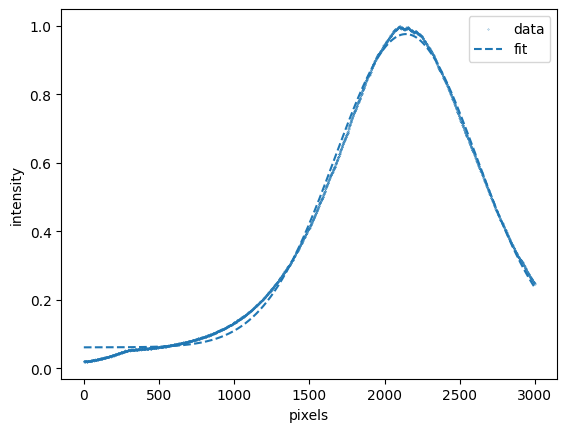

y waist = 3250.22 microns


In [59]:
um_per_pixel = 3.45 # for BFS-U3-122S6M-C
# um_per_pixel = 2.74 


files = ['C40-780PM_PC sensor.bmp', 'C40-LMA_PC sensor.bmp', 'C40-OZ_PC sensor.bmp']

xwaists = []
ywaists = []

for file in files:
    img = Image.open(os.path.join('data','misc',file))
    rows = np.array(img, dtype=float)
    
    xproj = np.sum(rows, axis=0)
    xproj /= max(xproj)
    yproj = np.sum(rows, axis=1)
    yproj /= max(yproj)
    
    xpts = np.arange(len(xproj))
    ypts = np.arange(len(yproj))
    
    gaussian_beam = lambda x, x0, w0, a, b: a*np.exp(-2*(x-x0)**2/w0**2) + b
    
    # x fit
    bounds = [
        [xpts[0], 50,  0.7, 0], # mins
        [xpts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=xpts, ydata=xproj, bounds=bounds)
    
    plt.scatter(xpts, xproj,label='data', s=0.05)
    plt.plot(xpts, gaussian_beam(xpts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()

    wx = popt[1]*um_per_pixel
    xwaists.append(wx)
    print(f"x waist = {wx:.2f} microns")
    
    # y fit
    bounds = [
        [ypts[0], 50,  0.7, 0], # mins
        [ypts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=ypts, ydata=yproj, bounds=bounds)
    
    plt.scatter(ypts, yproj,label='data',s=0.05)
    plt.plot(ypts, gaussian_beam(ypts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()
    wy = popt[1]*um_per_pixel
    ywaists.append(wy)
    print(f"y waist = {wy:.2f} microns")

In [28]:
[float(x) for x in xwaists]

[2819.9411285936003,
 2929.383180147357,
 3036.213788276002,
 3144.7163121352464,
 3253.938332068052,
 3364.172607778047,
 3473.255496859016,
 3583.180860923649,
 3693.0173097888796,
 3803.0760934415066]

In [29]:
[float(y) for y in xwaists]

[2819.9411285936003,
 2929.383180147357,
 3036.213788276002,
 3144.7163121352464,
 3253.938332068052,
 3364.172607778047,
 3473.255496859016,
 3583.180860923649,
 3693.0173097888796,
 3803.0760934415066]

In [59]:
xwaists[1] - xwaists[0]

np.float64(95.92470793973962)

In [30]:
xwaists = np.array(xwaists)
ywaists = np.array(ywaists)

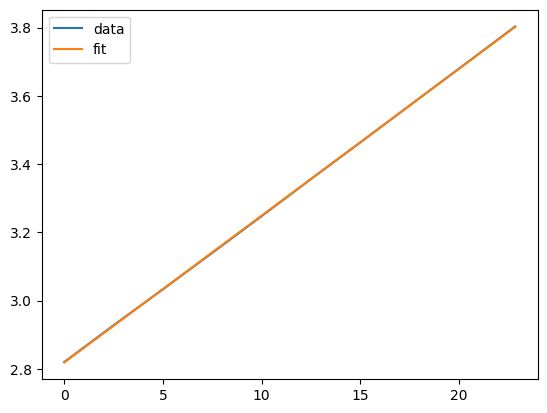

[0.04300726 2.81851658]


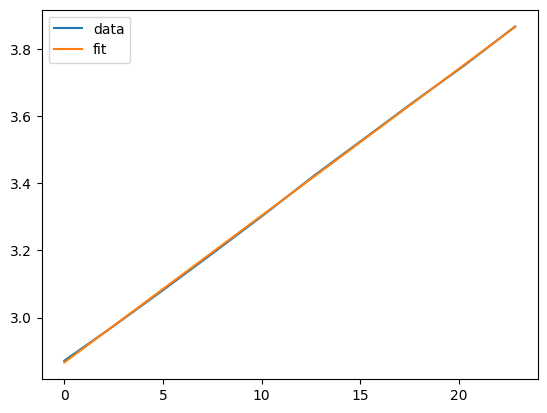

[0.04368474 2.86646964]


In [31]:
mm_pts = np.array(range(10))*0.1*25.4
plt.plot(mm_pts, xwaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=xwaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

plt.plot(mm_pts, ywaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=ywaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

In [32]:
# MFD of fiber:
NA = 0.043
2*8.5e-7/(np.pi*NA)

1.2584344337498704e-05

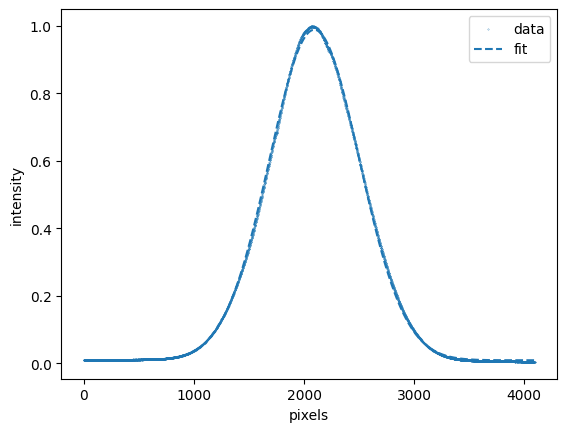

x waist = 2819.94 microns


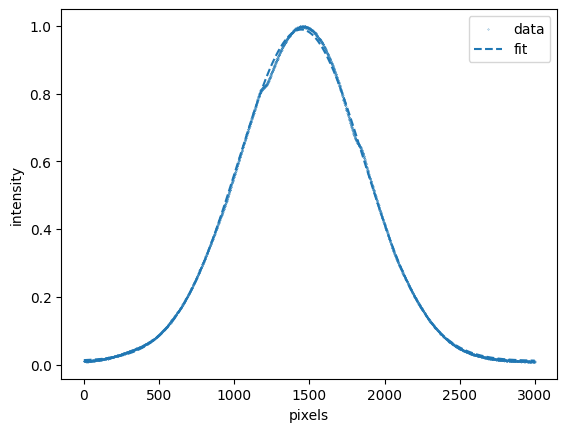

y waist = 2871.87 microns


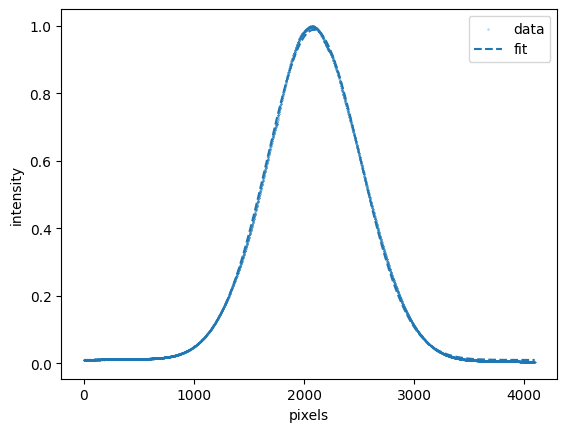

x waist = 2929.38 microns


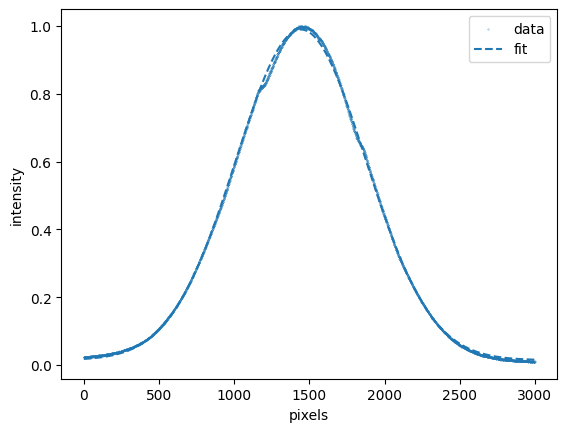

y waist = 2976.48 microns


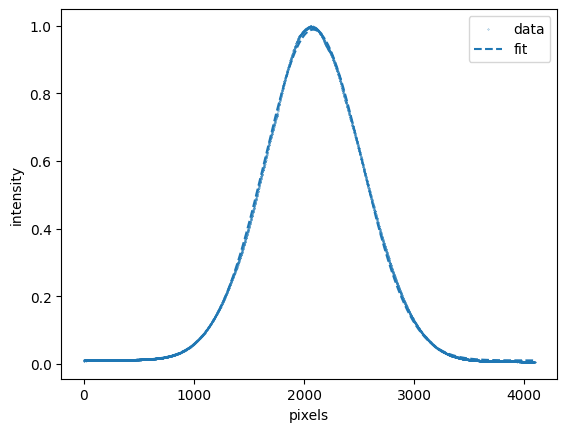

x waist = 3036.21 microns


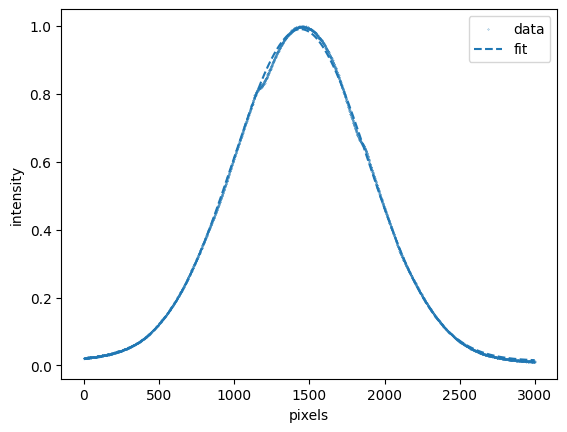

y waist = 3084.93 microns


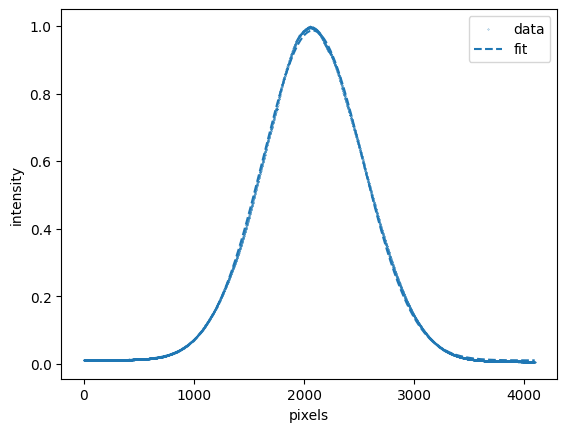

x waist = 3144.72 microns


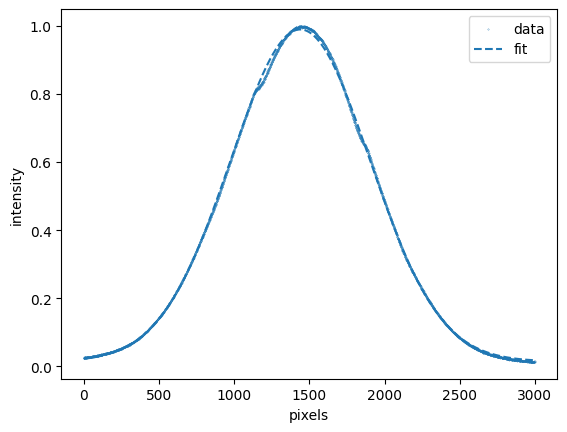

y waist = 3195.62 microns


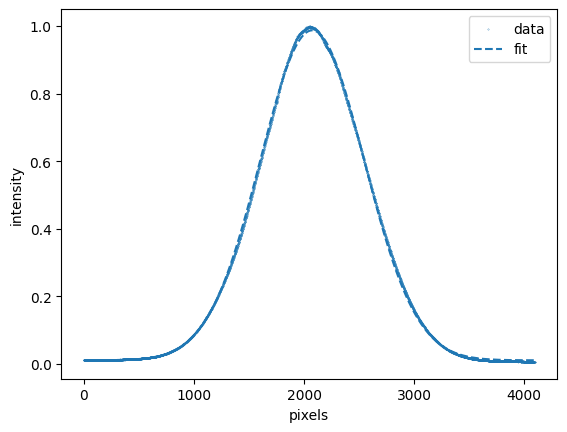

x waist = 3253.94 microns


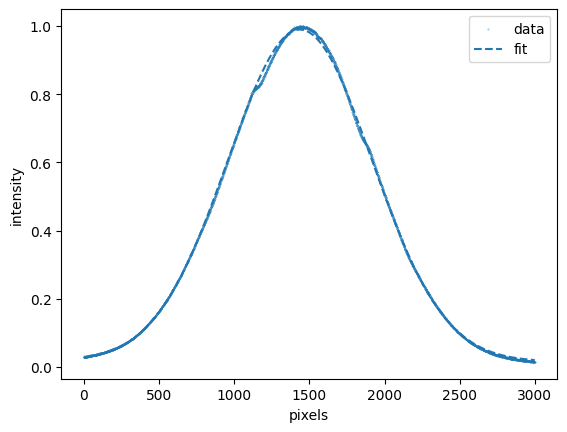

y waist = 3307.98 microns


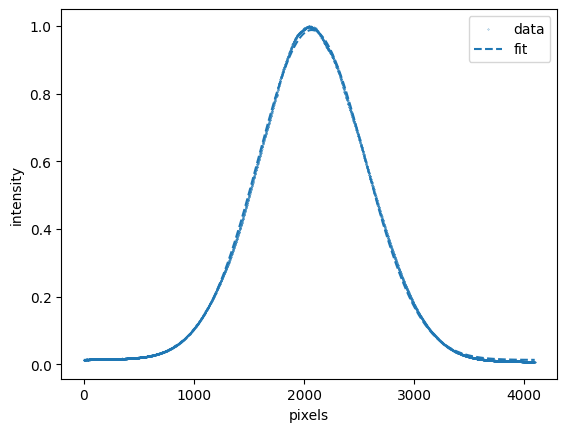

x waist = 3364.17 microns


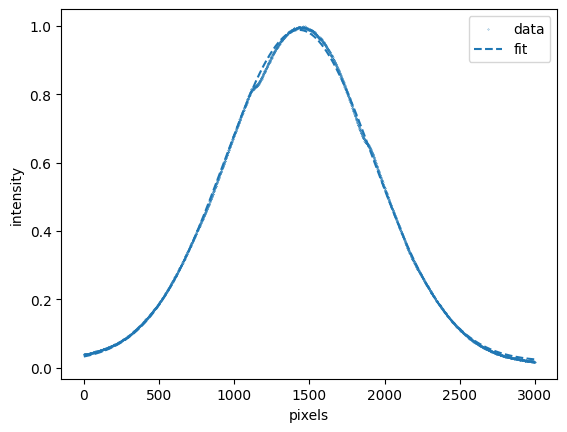

y waist = 3423.92 microns


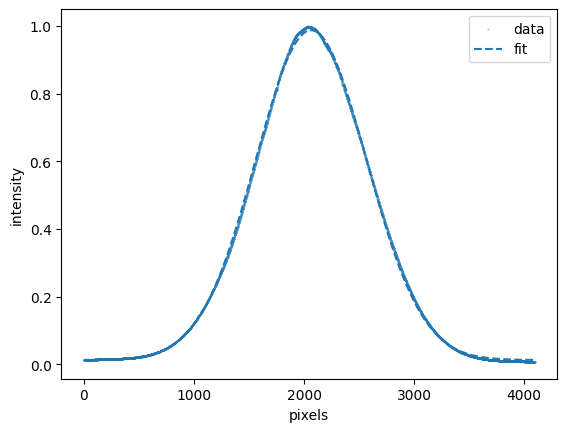

x waist = 3473.26 microns


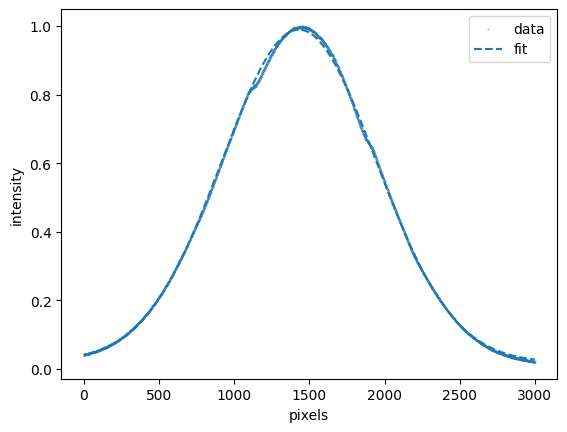

y waist = 3534.16 microns


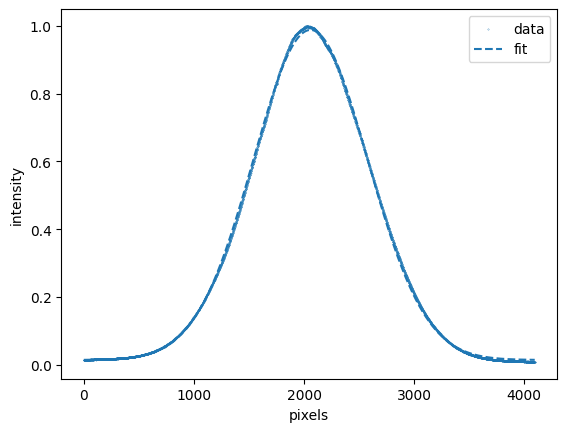

x waist = 3583.18 microns


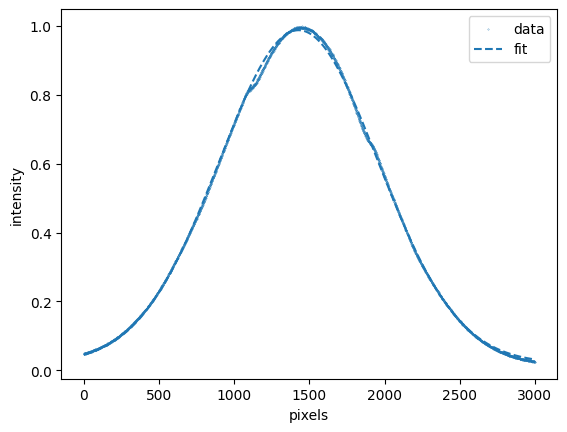

y waist = 3644.65 microns


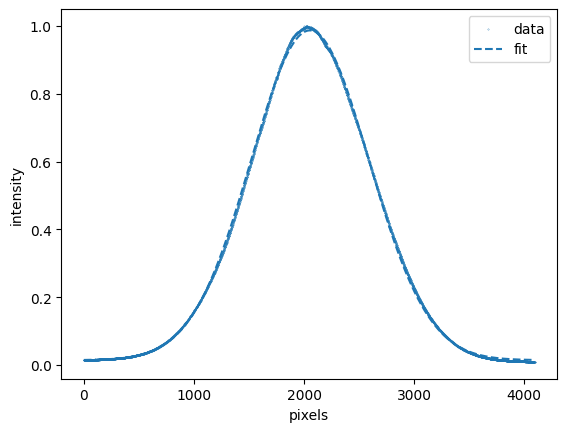

x waist = 3693.02 microns


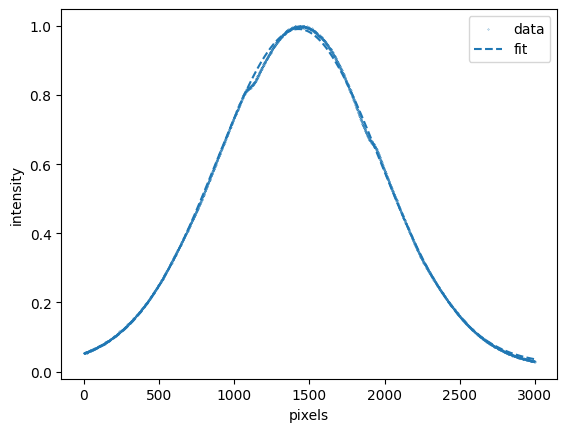

y waist = 3751.97 microns


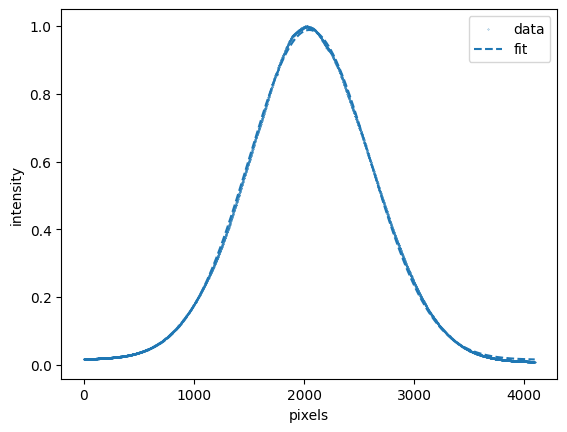

x waist = 3803.08 microns


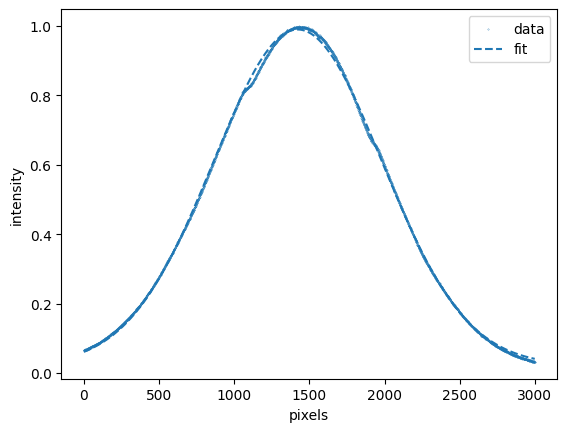

y waist = 3866.28 microns


In [27]:
um_per_pixel = 3.45 # for BFS-U3-122S6M-C

files = [f'{i}mm.bmp' for i in range(10)]

xwaists = []
ywaists = []

for file in files:
    img = Image.open(os.path.join('data','LMA-PM-15 NA new measurements',file))
    rows = np.array(img, dtype=float)
    
    xproj = np.sum(rows, axis=0)
    xproj /= max(xproj)
    yproj = np.sum(rows, axis=1)
    yproj /= max(yproj)
    
    xpts = np.arange(len(xproj))
    ypts = np.arange(len(yproj))
    
    gaussian_beam = lambda x, x0, w0, a, b: a*np.exp(-2*(x-x0)**2/w0**2) + b
    
    # x fit
    bounds = [
        [xpts[0], 50,  0.7, 0], # mins
        [xpts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=xpts, ydata=xproj, bounds=bounds)
    
    plt.scatter(xpts, xproj,label='data', s=0.05)
    plt.plot(xpts, gaussian_beam(xpts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()

    wx = popt[1]*um_per_pixel
    xwaists.append(wx)
    print(f"x waist = {wx:.2f} microns")
    
    # y fit
    bounds = [
        [ypts[0], 50,  0.7, 0], # mins
        [ypts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=ypts, ydata=yproj, bounds=bounds)
    
    plt.scatter(ypts, yproj,label='data',s=0.05)
    plt.plot(ypts, gaussian_beam(ypts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()
    wy = popt[1]*um_per_pixel
    ywaists.append(wy)
    print(f"y waist = {wy:.2f} microns")

In [28]:
[float(x) for x in xwaists]

[2819.9411285936003,
 2929.383180147357,
 3036.213788276002,
 3144.7163121352464,
 3253.938332068052,
 3364.172607778047,
 3473.255496859016,
 3583.180860923649,
 3693.0173097888796,
 3803.0760934415066]

In [29]:
[float(y) for y in xwaists]

[2819.9411285936003,
 2929.383180147357,
 3036.213788276002,
 3144.7163121352464,
 3253.938332068052,
 3364.172607778047,
 3473.255496859016,
 3583.180860923649,
 3693.0173097888796,
 3803.0760934415066]

In [59]:
xwaists[1] - xwaists[0]

np.float64(95.92470793973962)

In [30]:
xwaists = np.array(xwaists)
ywaists = np.array(ywaists)

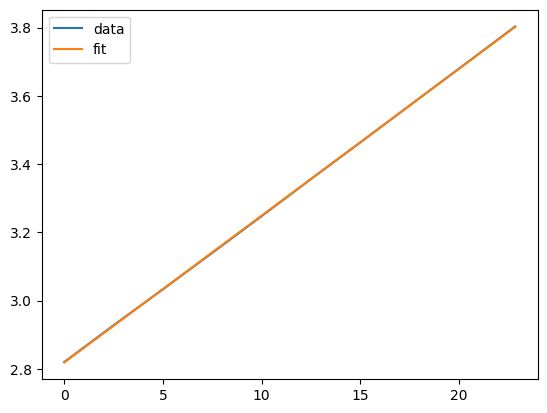

[0.04300726 2.81851658]


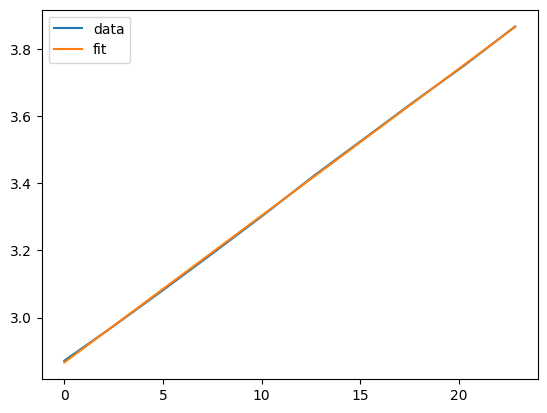

[0.04368474 2.86646964]


In [31]:
mm_pts = np.array(range(10))*0.1*25.4
plt.plot(mm_pts, xwaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=xwaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

plt.plot(mm_pts, ywaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=ywaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

In [32]:
# MFD of fiber:
NA = 0.043
2*8.5e-7/(np.pi*NA)

1.2584344337498704e-05

## LMA fiber - new data

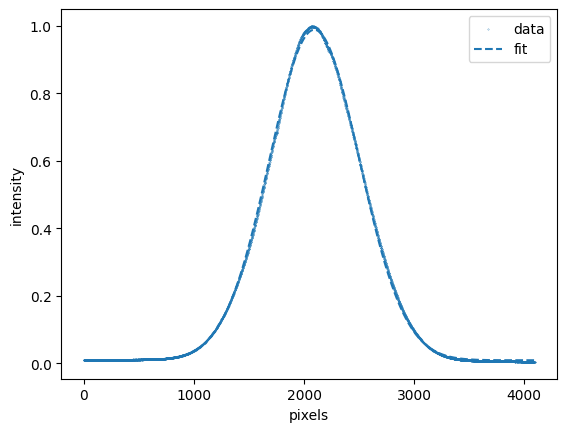

x waist = 2819.94 microns


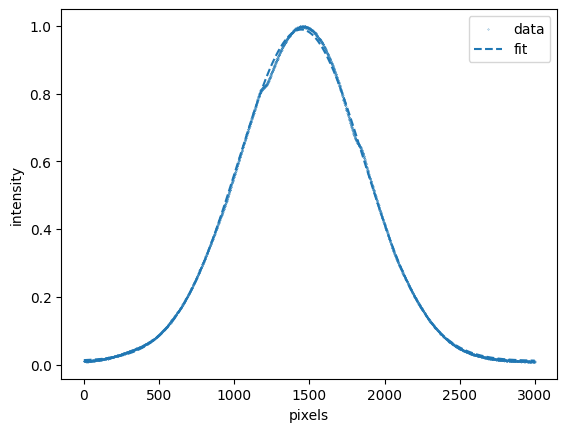

y waist = 2871.87 microns


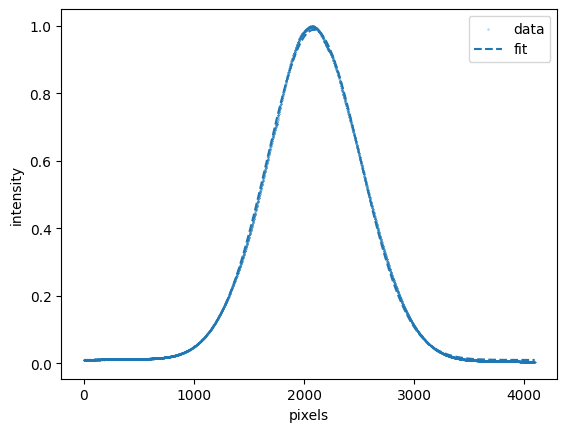

x waist = 2929.38 microns


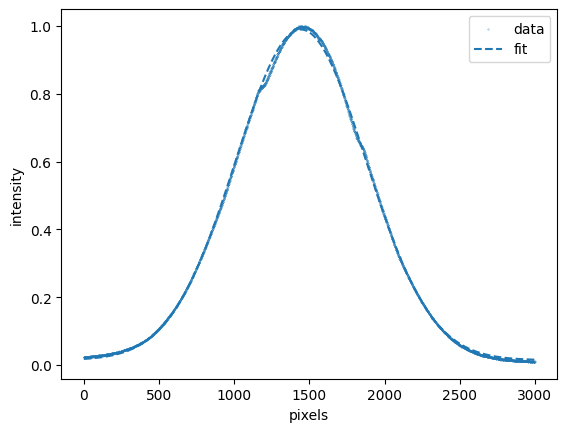

y waist = 2976.48 microns


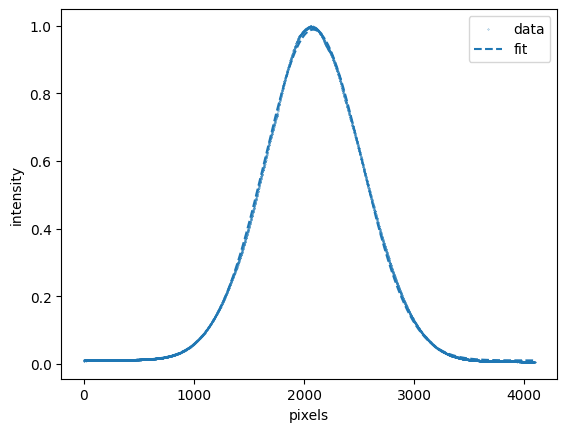

x waist = 3036.21 microns


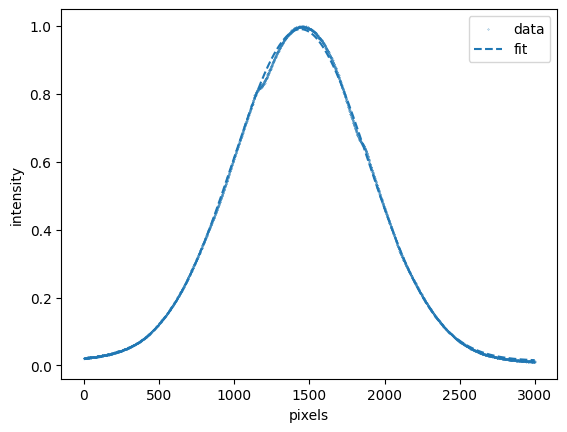

y waist = 3084.93 microns


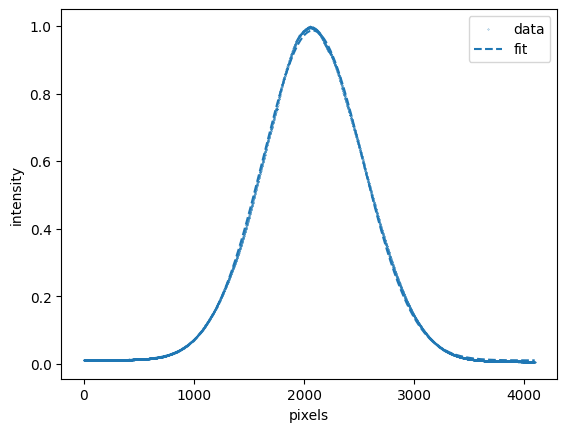

x waist = 3144.72 microns


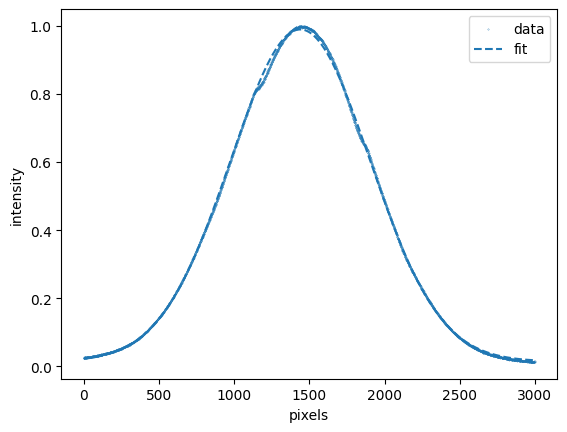

y waist = 3195.62 microns


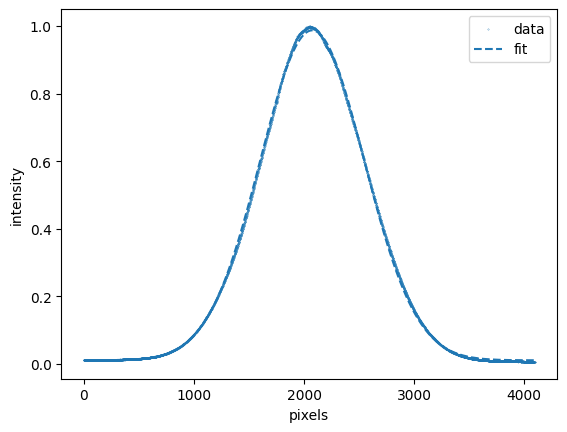

x waist = 3253.94 microns


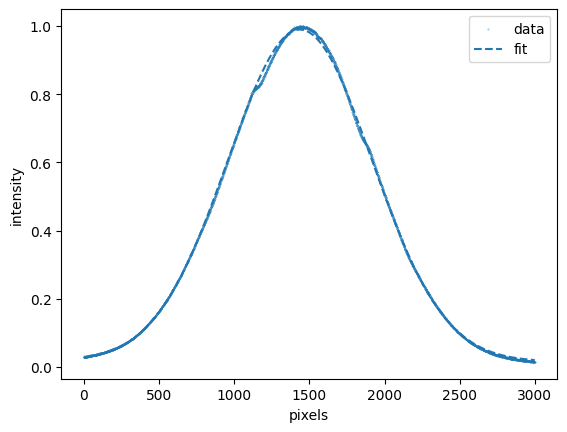

y waist = 3307.98 microns


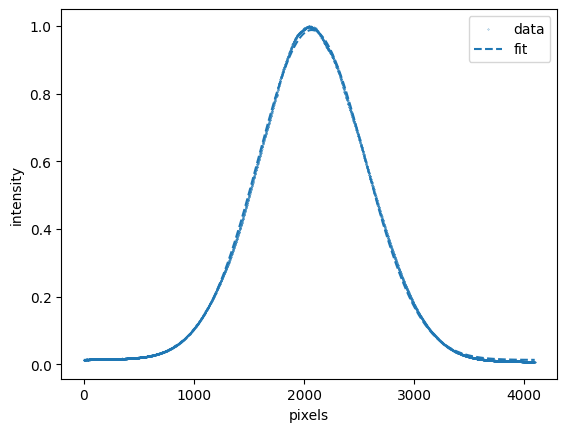

x waist = 3364.17 microns


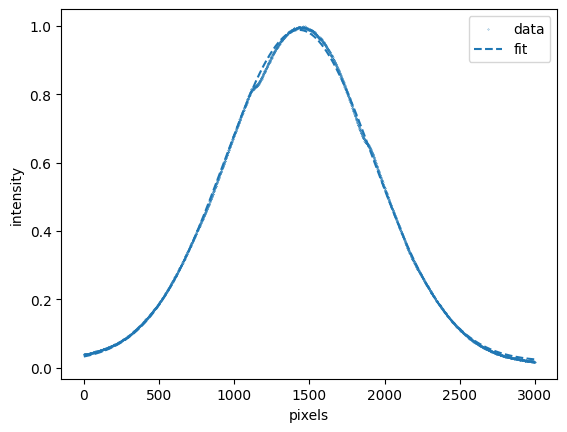

y waist = 3423.92 microns


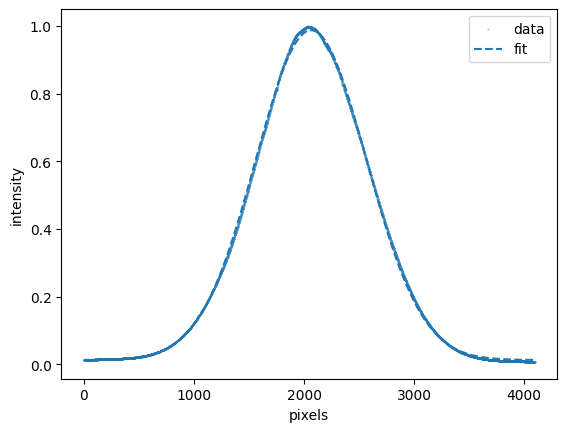

x waist = 3473.26 microns


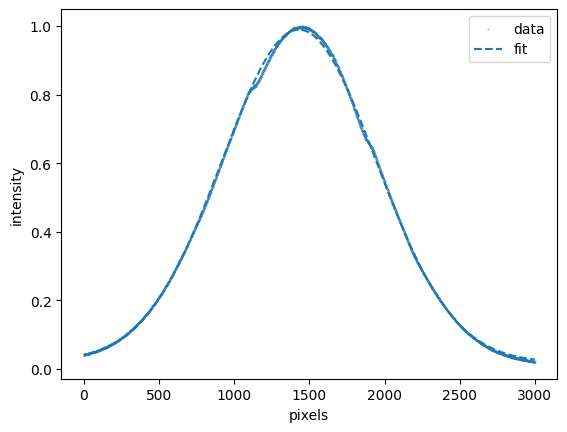

y waist = 3534.16 microns


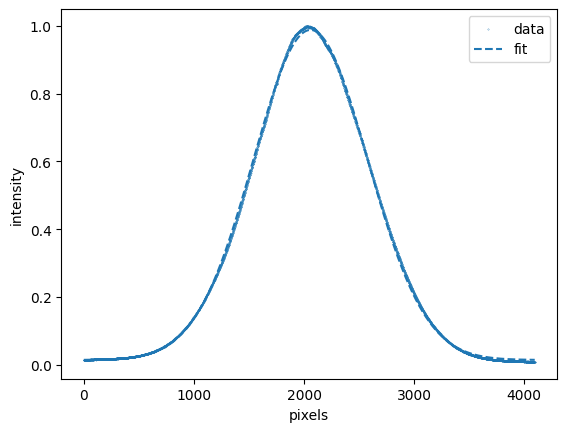

x waist = 3583.18 microns


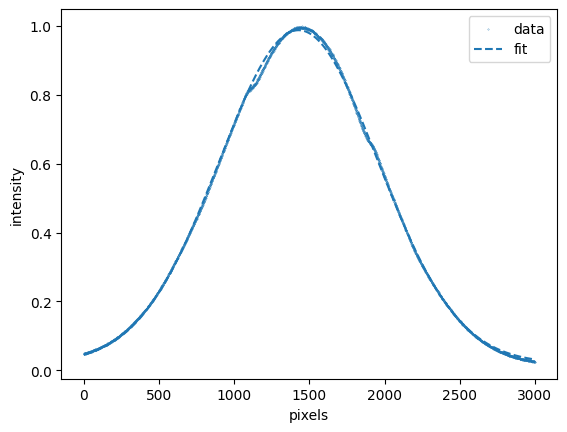

y waist = 3644.65 microns


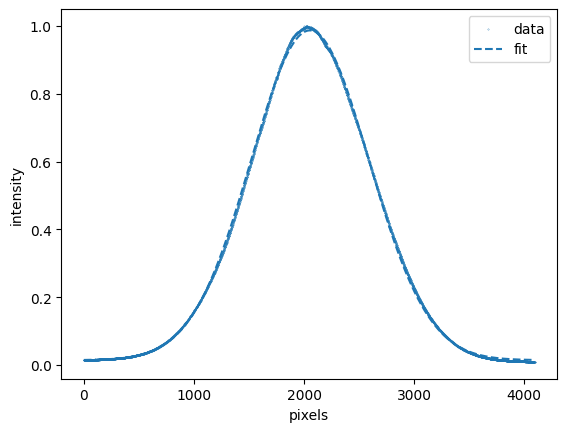

x waist = 3693.02 microns


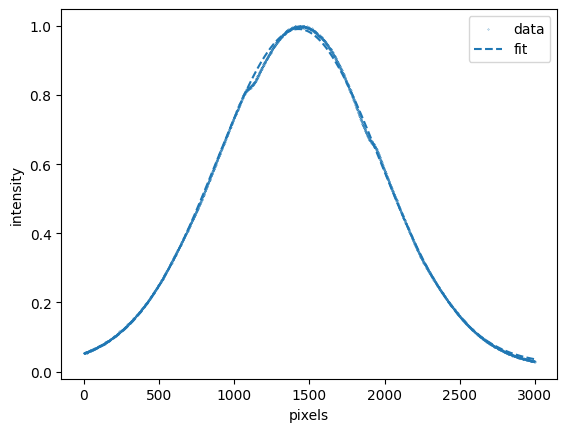

y waist = 3751.97 microns


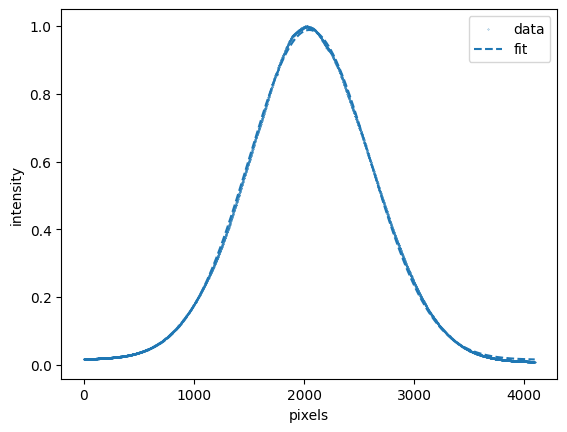

x waist = 3803.08 microns


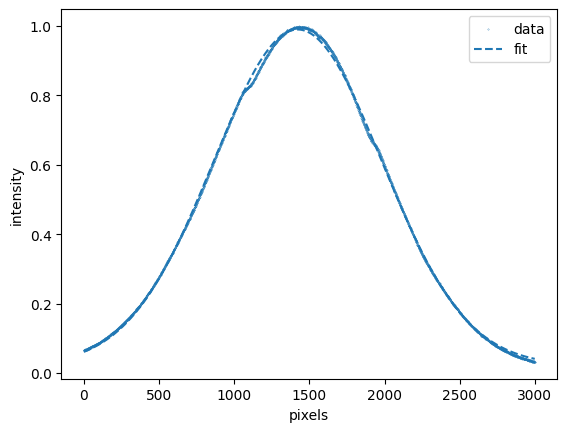

y waist = 3866.28 microns


In [27]:
um_per_pixel = 3.45 # for BFS-U3-122S6M-C

files = [f'{i}mm.bmp' for i in range(10)]

xwaists = []
ywaists = []

for file in files:
    img = Image.open(os.path.join('data','LMA-PM-15 NA new measurements',file))
    rows = np.array(img, dtype=float)
    
    xproj = np.sum(rows, axis=0)
    xproj /= max(xproj)
    yproj = np.sum(rows, axis=1)
    yproj /= max(yproj)
    
    xpts = np.arange(len(xproj))
    ypts = np.arange(len(yproj))
    
    gaussian_beam = lambda x, x0, w0, a, b: a*np.exp(-2*(x-x0)**2/w0**2) + b
    
    # x fit
    bounds = [
        [xpts[0], 50,  0.7, 0], # mins
        [xpts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=xpts, ydata=xproj, bounds=bounds)
    
    plt.scatter(xpts, xproj,label='data', s=0.05)
    plt.plot(xpts, gaussian_beam(xpts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()

    wx = popt[1]*um_per_pixel
    xwaists.append(wx)
    print(f"x waist = {wx:.2f} microns")
    
    # y fit
    bounds = [
        [ypts[0], 50,  0.7, 0], # mins
        [ypts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=ypts, ydata=yproj, bounds=bounds)
    
    plt.scatter(ypts, yproj,label='data',s=0.05)
    plt.plot(ypts, gaussian_beam(ypts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()
    wy = popt[1]*um_per_pixel
    ywaists.append(wy)
    print(f"y waist = {wy:.2f} microns")

In [28]:
[float(x) for x in xwaists]

[2819.9411285936003,
 2929.383180147357,
 3036.213788276002,
 3144.7163121352464,
 3253.938332068052,
 3364.172607778047,
 3473.255496859016,
 3583.180860923649,
 3693.0173097888796,
 3803.0760934415066]

In [29]:
[float(y) for y in xwaists]

[2819.9411285936003,
 2929.383180147357,
 3036.213788276002,
 3144.7163121352464,
 3253.938332068052,
 3364.172607778047,
 3473.255496859016,
 3583.180860923649,
 3693.0173097888796,
 3803.0760934415066]

In [59]:
xwaists[1] - xwaists[0]

np.float64(95.92470793973962)

In [30]:
xwaists = np.array(xwaists)
ywaists = np.array(ywaists)

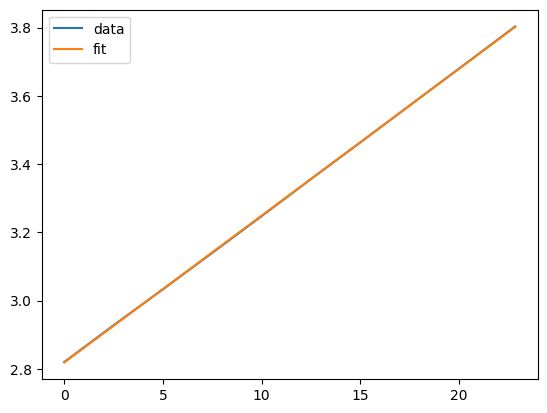

[0.04300726 2.81851658]


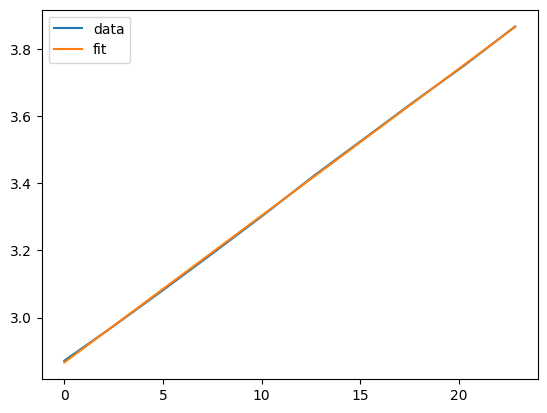

[0.04368474 2.86646964]


In [31]:
mm_pts = np.array(range(10))*0.1*25.4
plt.plot(mm_pts, xwaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=xwaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

plt.plot(mm_pts, ywaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=ywaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

In [32]:
# MFD of fiber:
NA = 0.043
2*8.5e-7/(np.pi*NA)

1.2584344337498704e-05

## 780 HP

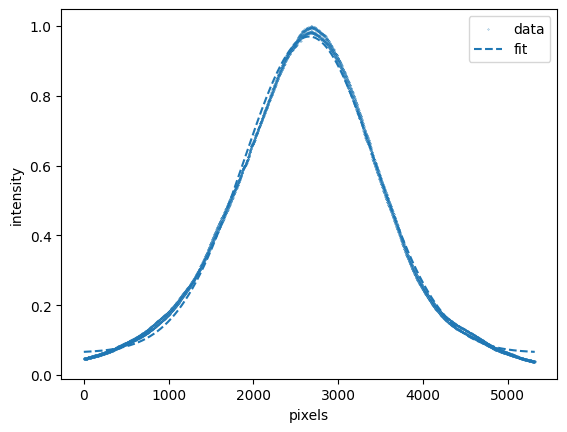

x waist = 4231.27 microns


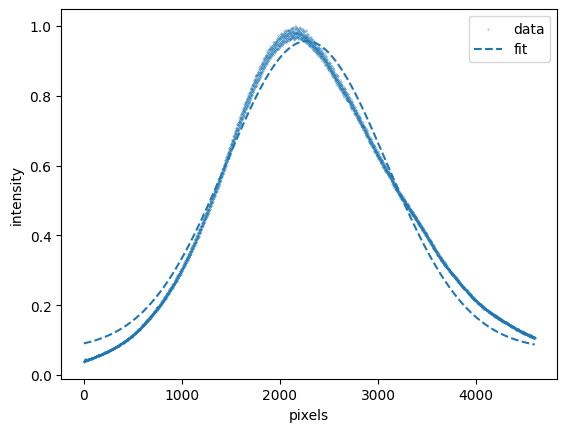

y waist = 4469.38 microns


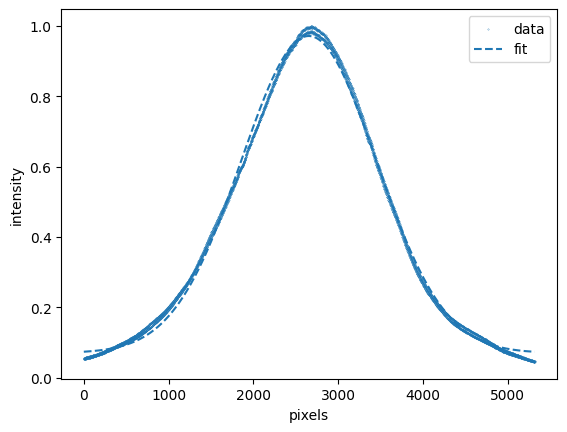

x waist = 4367.62 microns


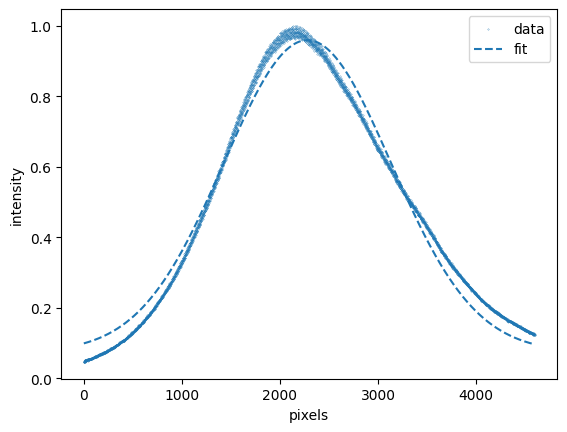

y waist = 4671.79 microns


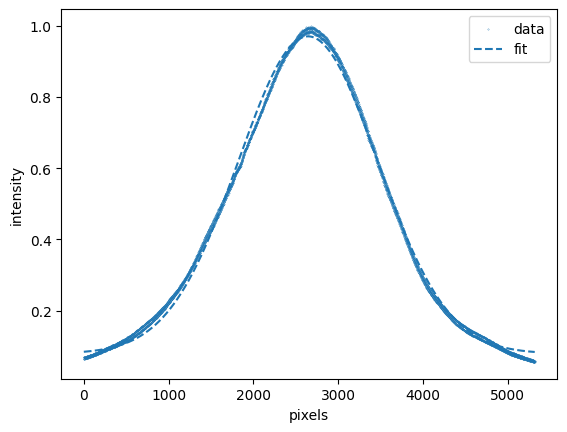

x waist = 4502.99 microns


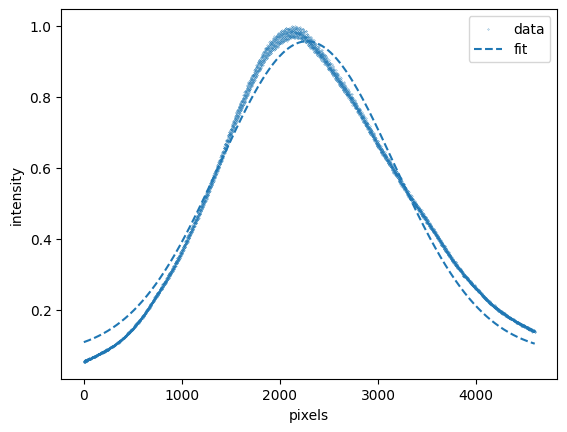

y waist = 4881.37 microns


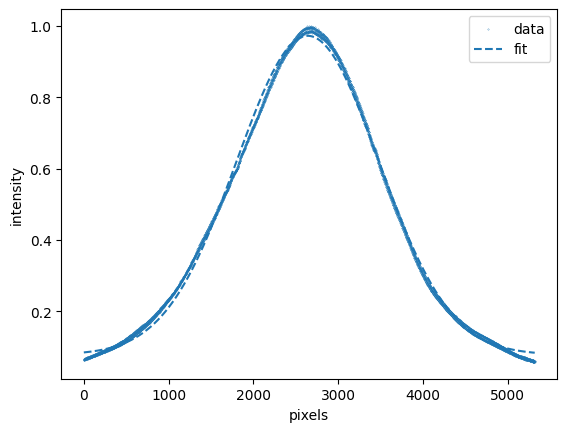

x waist = 4600.46 microns


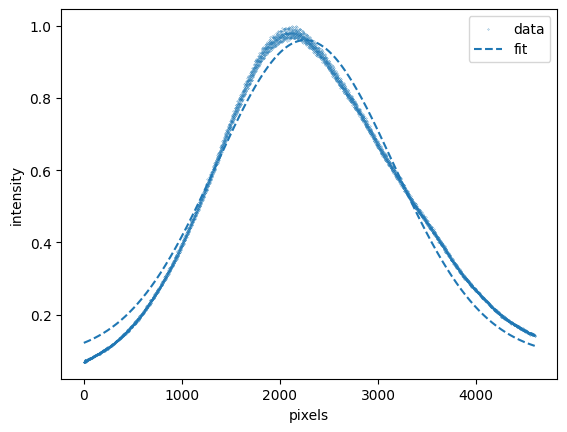

y waist = 4961.04 microns


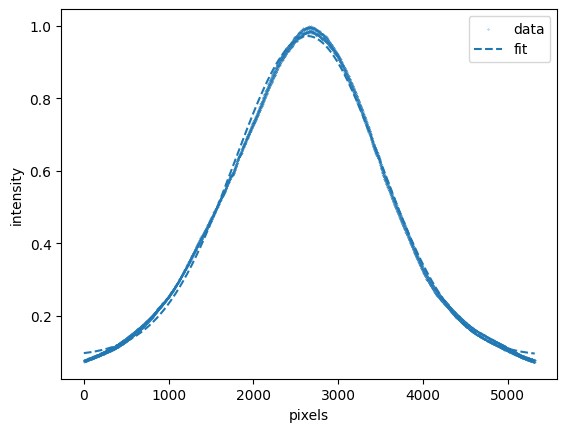

x waist = 4719.28 microns


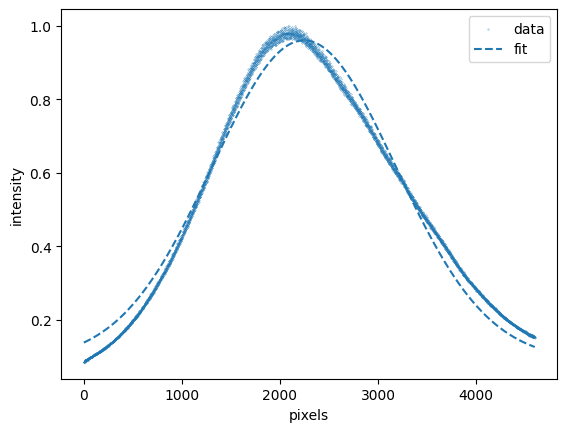

y waist = 5122.08 microns


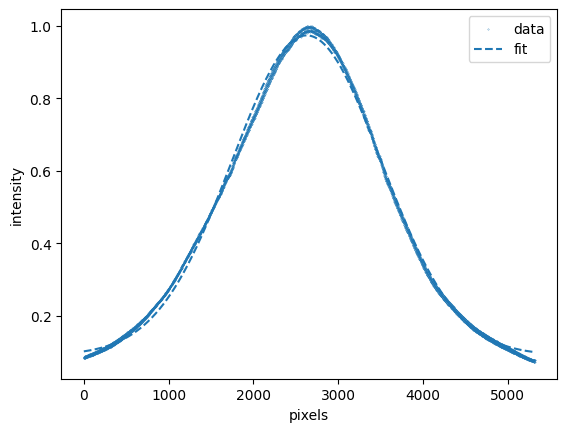

x waist = 4830.15 microns


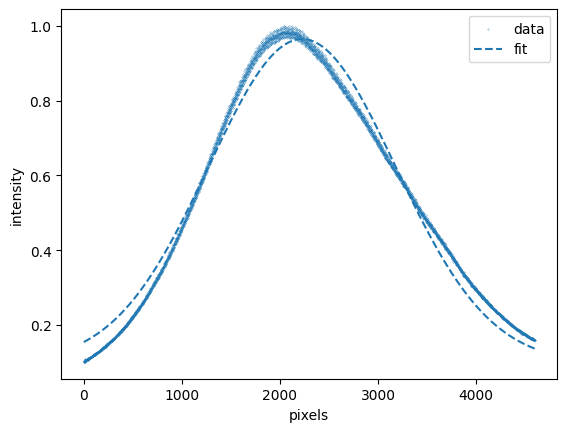

y waist = 5228.70 microns


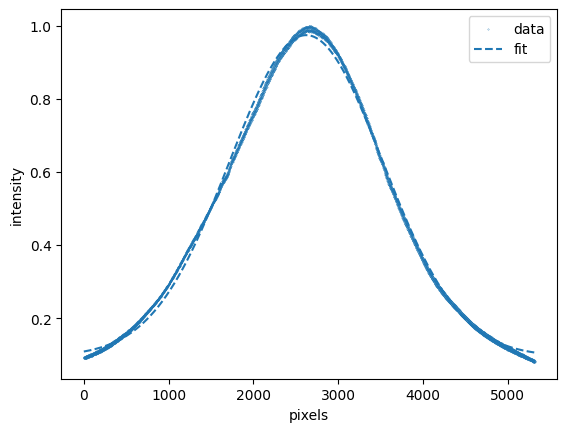

x waist = 4949.35 microns


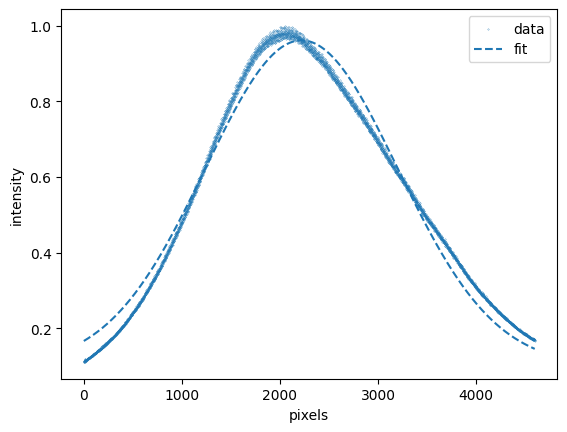

y waist = 5377.21 microns


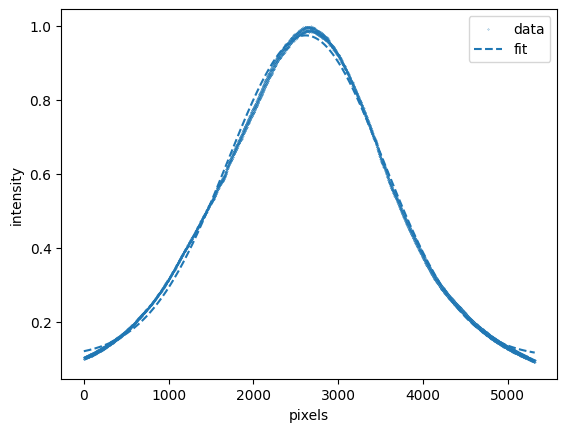

x waist = 5060.06 microns


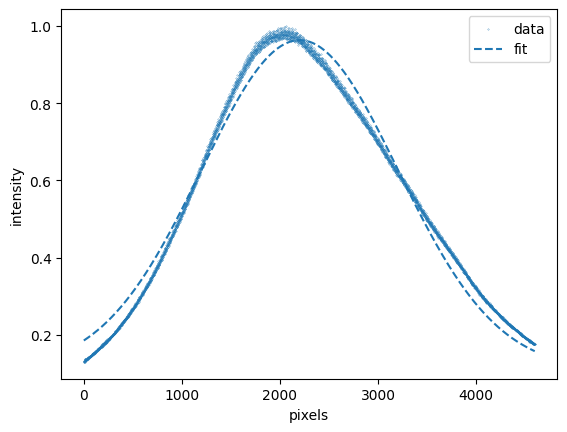

y waist = 5496.02 microns


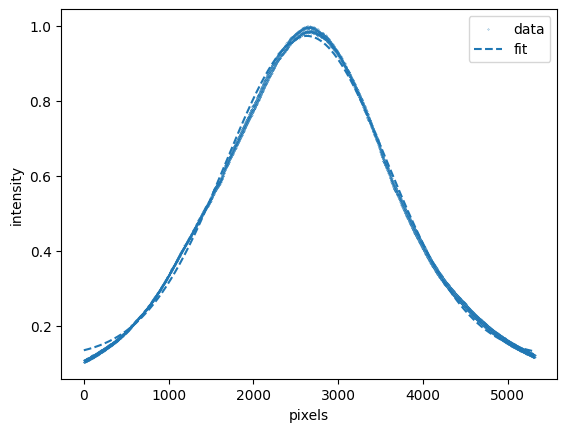

x waist = 5221.44 microns


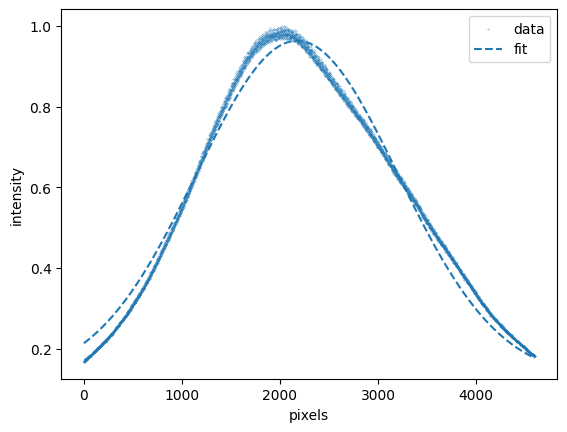

y waist = 5626.32 microns


In [42]:
um_per_pixel = 2.74 # for BFS-U3-244S8M-C

files = [f'{i}.bmp' for i in range(9)]

xwaists = []
ywaists = []

for file in files:
    # img = Image.open(os.path.join('data','780PM-HP NA',file)) # 2025.04.08
    # img = Image.open(os.path.join('data','780PM-HP NA_1',file)) # 2025.04.09
    img = Image.open(os.path.join('data','780PM-HP NA_2',file)) # 2025.04.09
    rows = np.array(img, dtype=float)
    
    xproj = np.sum(rows, axis=0)
    xproj /= max(xproj)
    yproj = np.sum(rows, axis=1)
    yproj /= max(yproj)
    
    xpts = np.arange(len(xproj))
    ypts = np.arange(len(yproj))
    
    gaussian_beam = lambda x, x0, w0, a, b: a*np.exp(-2*(x-x0)**2/w0**2) + b
    
    # x fit
    bounds = [
        [xpts[0], 50,  0.7, 0], # mins
        [xpts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=xpts, ydata=xproj, bounds=bounds)
    
    plt.scatter(xpts, xproj,label='data', s=0.05)
    plt.plot(xpts, gaussian_beam(xpts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()

    wx = popt[1]*um_per_pixel
    xwaists.append(wx)
    print(f"x waist = {wx:.2f} microns")
    
    # y fit
    bounds = [
        [ypts[0], 50,  0.7, 0], # mins
        [ypts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=ypts, ydata=yproj, bounds=bounds)
    
    plt.scatter(ypts, yproj,label='data',s=0.05)
    plt.plot(ypts, gaussian_beam(ypts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()
    wy = popt[1]*um_per_pixel
    ywaists.append(wy)
    print(f"y waist = {wy:.2f} microns")

In [36]:
[float(x) for x in xwaists]

[4284.711574409061,
 4382.925142413516,
 4482.398529459917,
 4617.839332544846,
 4762.544414470738,
 4882.649662931671,
 5008.39966309529,
 5059.46682990325,
 5190.748107717831]

In [37]:
[float(y) for y in xwaists]

[4284.711574409061,
 4382.925142413516,
 4482.398529459917,
 4617.839332544846,
 4762.544414470738,
 4882.649662931671,
 5008.39966309529,
 5059.46682990325,
 5190.748107717831]

In [11]:
xwaists[1] - xwaists[0]

np.float64(143.56683019278807)

In [43]:
xwaists = np.array(xwaists)
ywaists = np.array(ywaists)

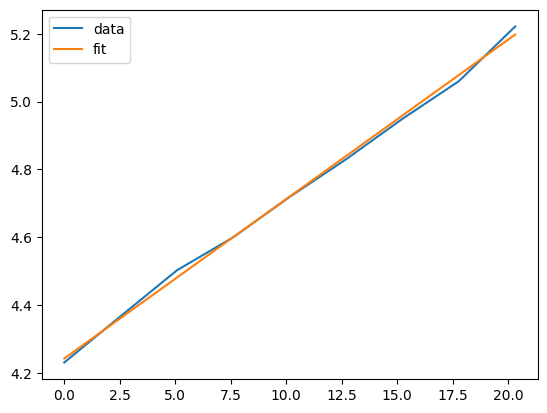

[0.04698437 4.24292996]


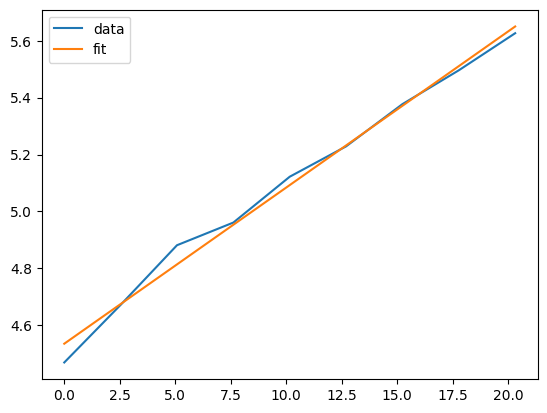

[0.05485449 4.53533552]


In [44]:
mm_pts = np.array(range(len(xwaists)))*0.1*25.4
plt.plot(mm_pts, xwaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=xwaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

plt.plot(mm_pts, ywaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=ywaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

In [40]:
# MFD of fiber:
NA = 0.047
2*8.5e-7/(np.pi*NA)

1.0209939745517814e-05

In [45]:
# MFD of fiber:
NA = 0.055
2*8.5e-7/(np.pi*NA)

9.838669209317167e-06

## OZ optics fiber

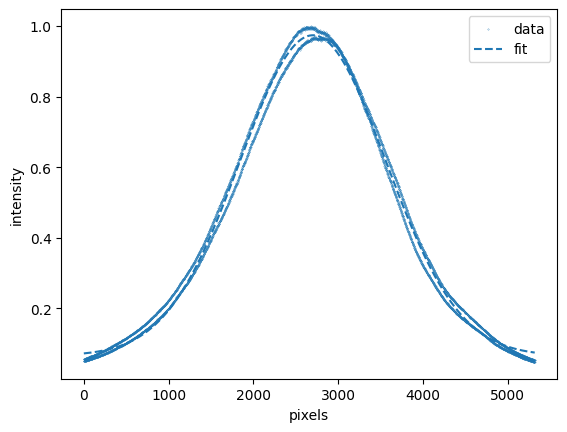

x waist = 4723.00 microns


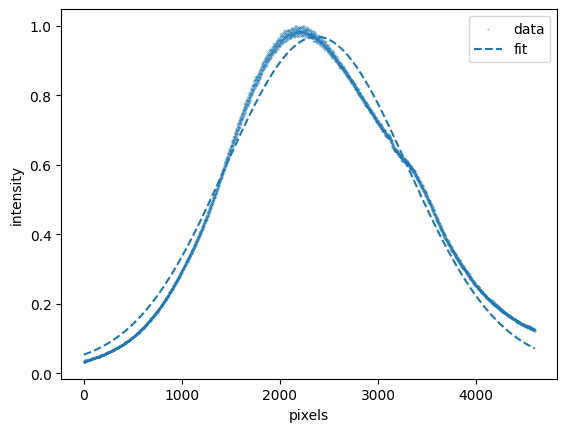

y waist = 5087.15 microns


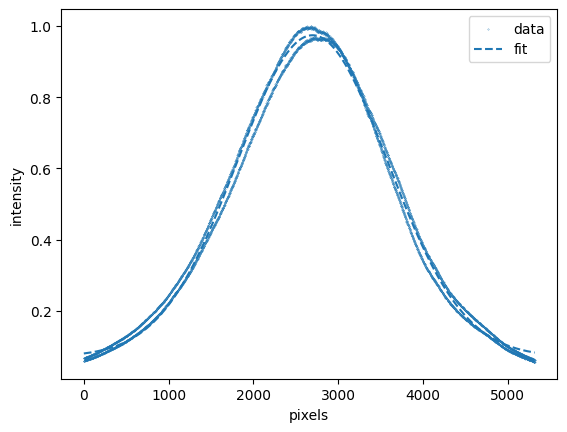

x waist = 4865.76 microns


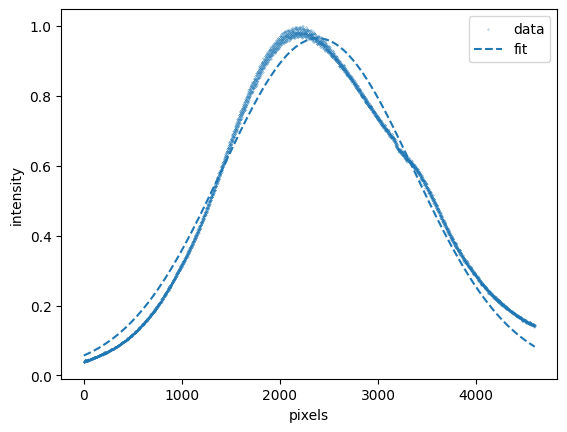

y waist = 5357.93 microns


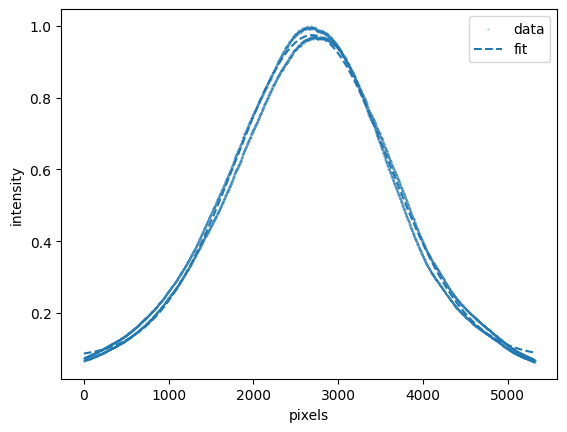

x waist = 4968.91 microns


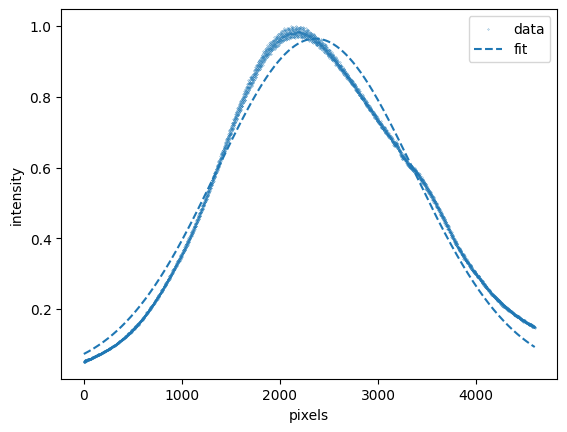

y waist = 5517.84 microns


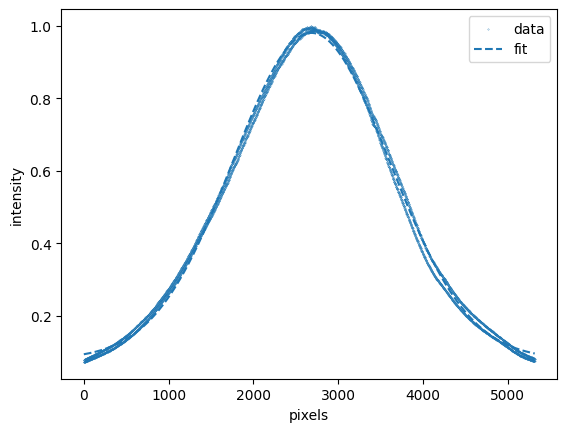

x waist = 5061.38 microns


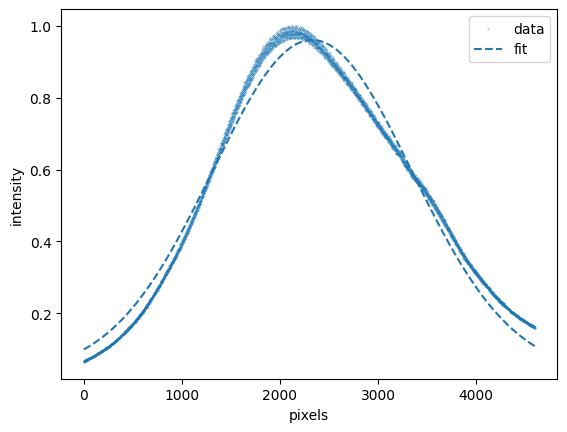

y waist = 5573.71 microns


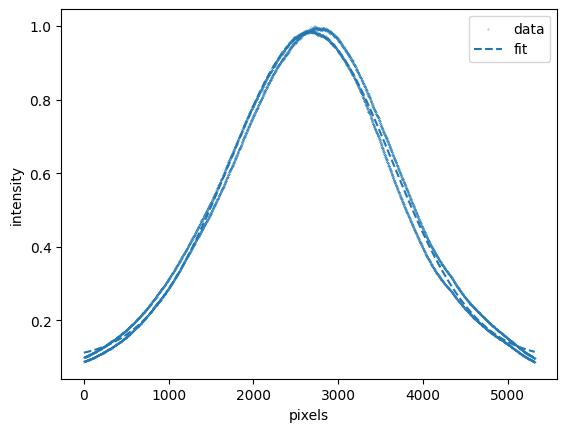

x waist = 5245.99 microns


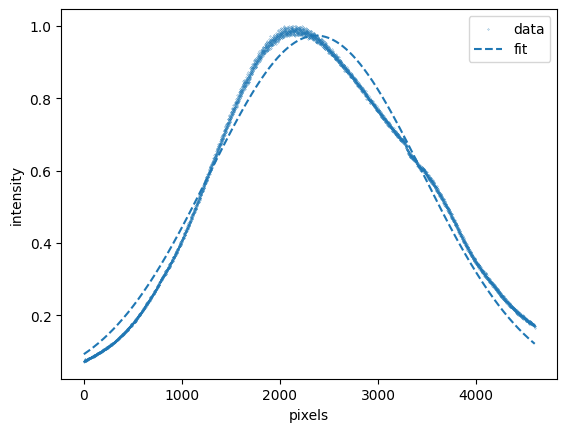

y waist = 5978.77 microns


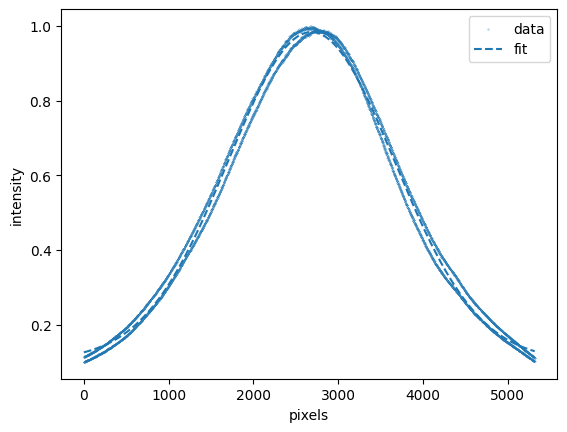

x waist = 5382.31 microns


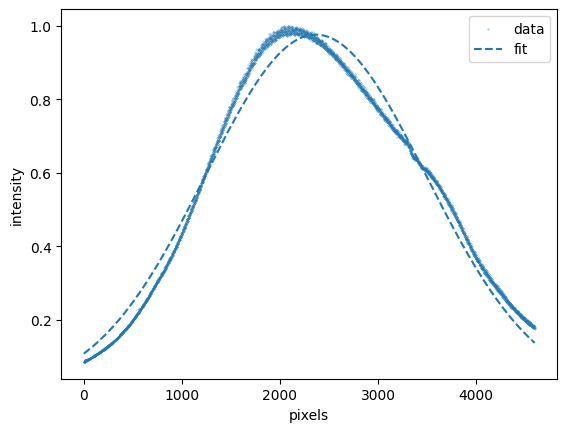

y waist = 6173.56 microns


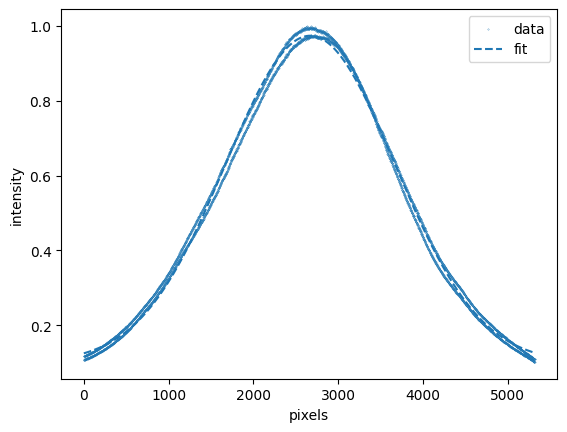

x waist = 5479.01 microns


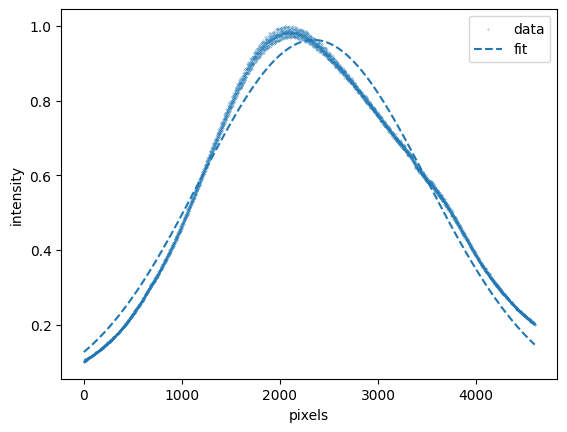

y waist = 6375.91 microns


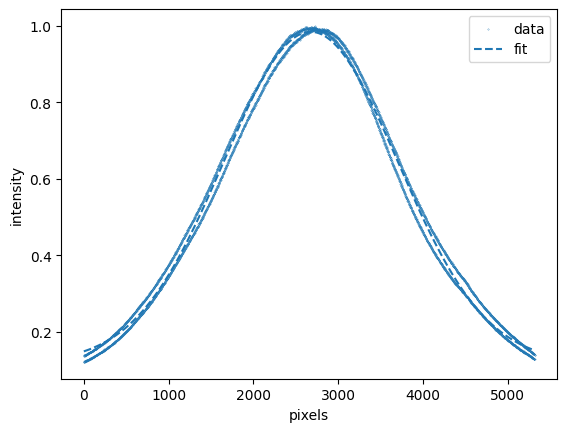

x waist = 5635.11 microns


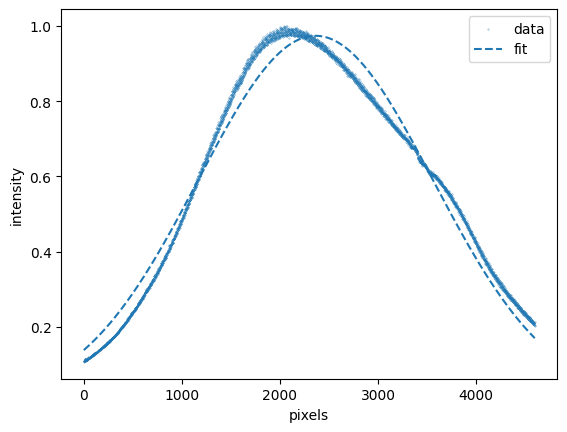

y waist = 6560.04 microns


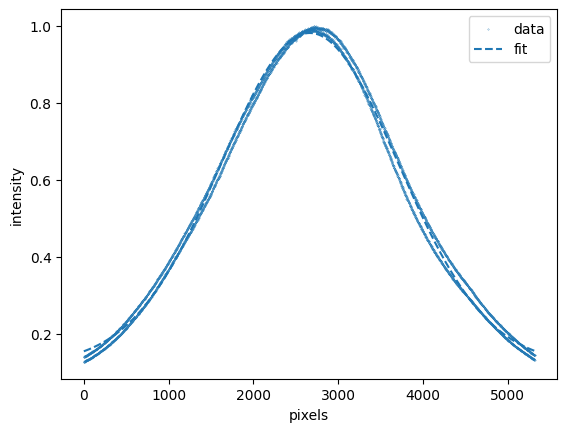

x waist = 5717.99 microns


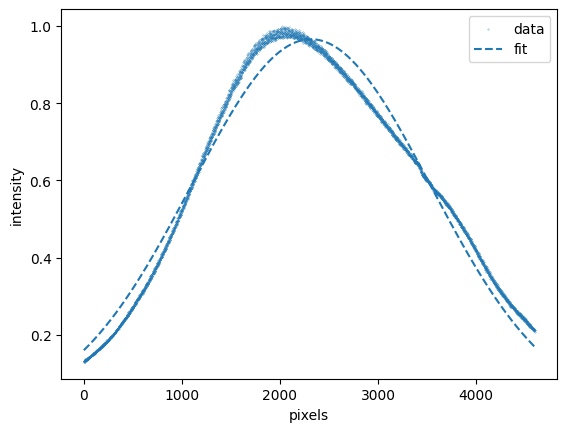

y waist = 6700.08 microns


In [52]:
um_per_pixel = 2.74 # for BFS-U3-244S8M-C

files = [f'{i}.bmp' for i in range(9)]

xwaists = []
ywaists = []

for file in files:
    # img = Image.open(os.path.join('data','OZoptics-NA',file)) # 2025.04.08
    # img = Image.open(os.path.join('data','OZ-optics-NA_1',file)) # 2025.04.09
    img = Image.open(os.path.join('data','OZ-optics-NA_2',file)) # 2025.04.09
    rows = np.array(img, dtype=float)
    
    xproj = np.sum(rows, axis=0)
    xproj /= max(xproj)
    yproj = np.sum(rows, axis=1)
    yproj /= max(yproj)
    
    xpts = np.arange(len(xproj))
    ypts = np.arange(len(yproj))
    
    gaussian_beam = lambda x, x0, w0, a, b: a*np.exp(-2*(x-x0)**2/w0**2) + b
    
    # x fit
    bounds = [
        [xpts[0], 50,  0.7, 0], # mins
        [xpts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=xpts, ydata=xproj, bounds=bounds)
    
    plt.scatter(xpts, xproj,label='data', s=0.05)
    plt.plot(xpts, gaussian_beam(xpts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()

    wx = popt[1]*um_per_pixel
    xwaists.append(wx)
    print(f"x waist = {wx:.2f} microns")
    
    # y fit
    bounds = [
        [ypts[0], 50,  0.7, 0], # mins
        [ypts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=ypts, ydata=yproj, bounds=bounds)
    
    plt.scatter(ypts, yproj,label='data',s=0.05)
    plt.plot(ypts, gaussian_beam(ypts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()
    wy = popt[1]*um_per_pixel
    ywaists.append(wy)
    print(f"y waist = {wy:.2f} microns")

In [19]:
[float(x) for x in xwaists]

[4731.34644981391,
 4889.5231178720405,
 5020.228768914133,
 5119.436007165452,
 5258.697557922909,
 5385.26291707128,
 5510.189428330376,
 5650.911617158938]

In [20]:
[float(y) for y in xwaists]

[4731.34644981391,
 4889.5231178720405,
 5020.228768914133,
 5119.436007165452,
 5258.697557922909,
 5385.26291707128,
 5510.189428330376,
 5650.911617158938]

In [21]:
xwaists[1] - xwaists[0]

np.float64(158.17666805813042)

In [53]:
xwaists = np.array(xwaists)
ywaists = np.array(ywaists)

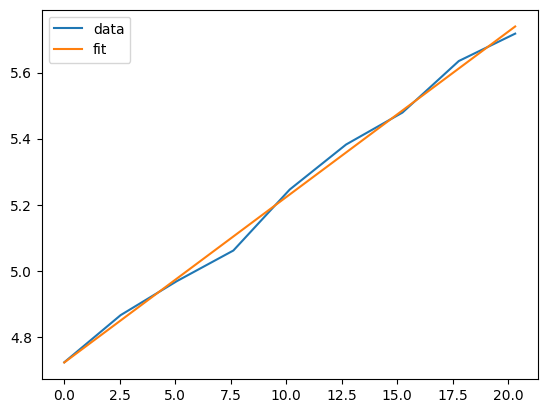

[0.05005991 4.72244187]


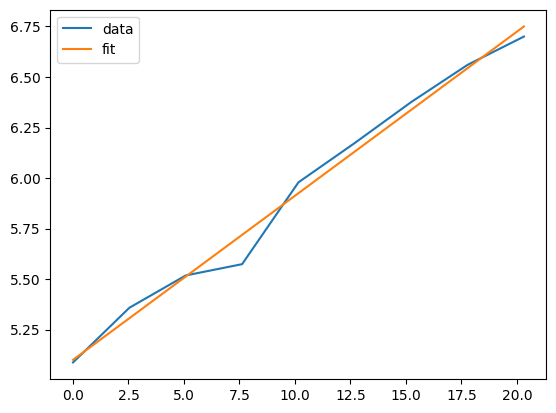

[0.08119465 5.10006221]


In [54]:
mm_pts = np.array(range(len(xwaists)))*0.1*25.4
plt.plot(mm_pts, xwaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=xwaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

plt.plot(mm_pts, ywaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=ywaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

In [56]:
# MFD of fiber:
NA = 0.05
2*8.5e-7/(np.pi*NA)

1.0822536130248883e-05

In [57]:
# MFD of fiber:
NA = 0.08
2*8.5e-7/(np.pi*NA)

6.7640850814055515e-06

## LMA fiber

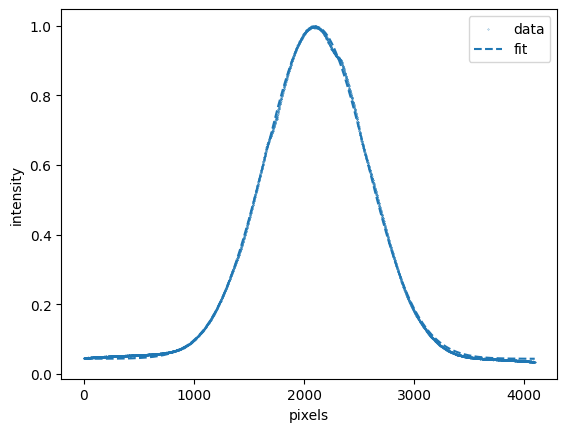

x waist = 3175.37 microns


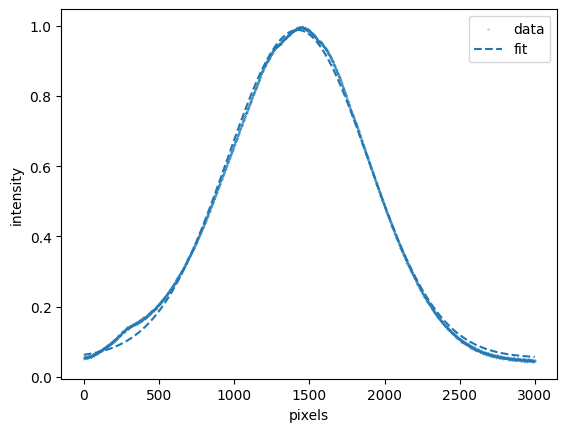

y waist = 3226.96 microns


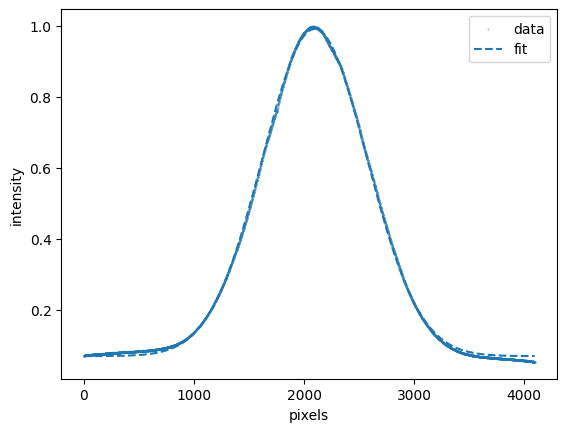

x waist = 3271.29 microns


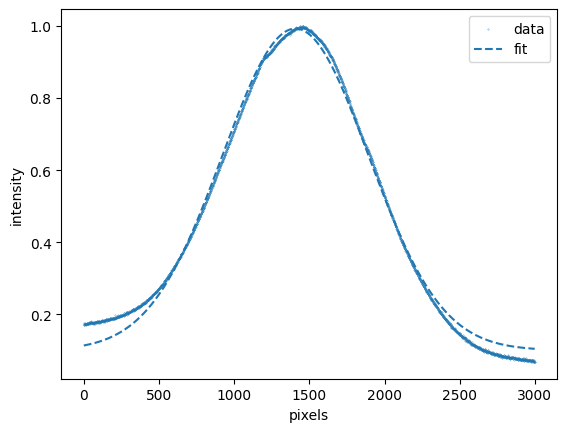

y waist = 3346.88 microns


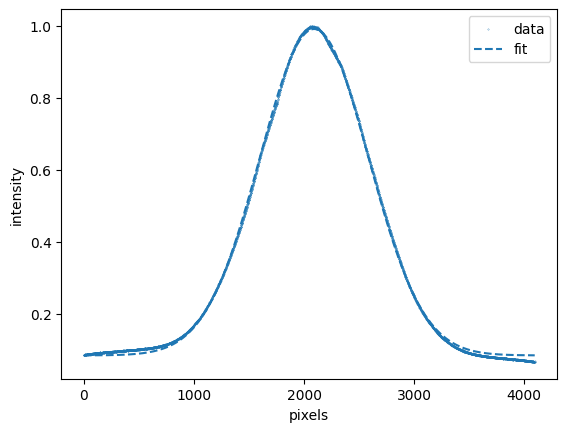

x waist = 3400.48 microns


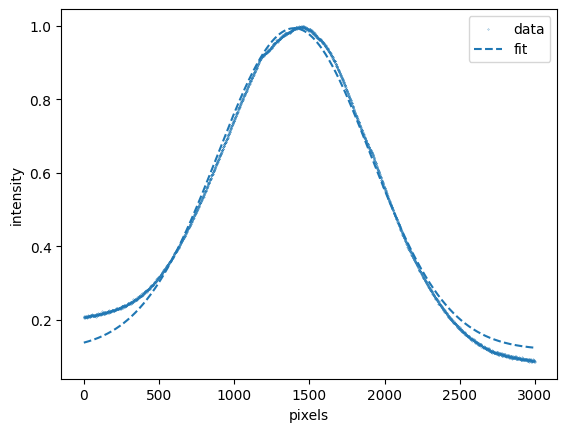

y waist = 3512.74 microns


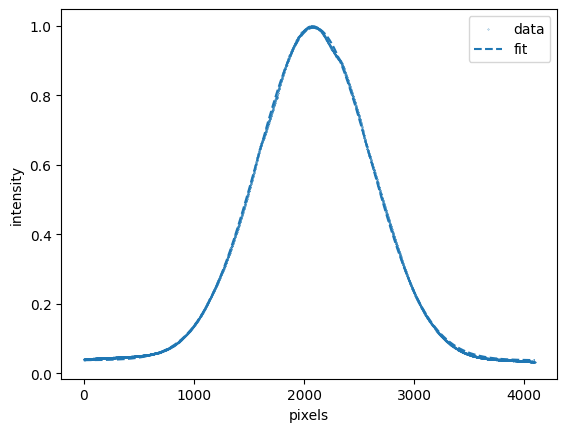

x waist = 3530.82 microns


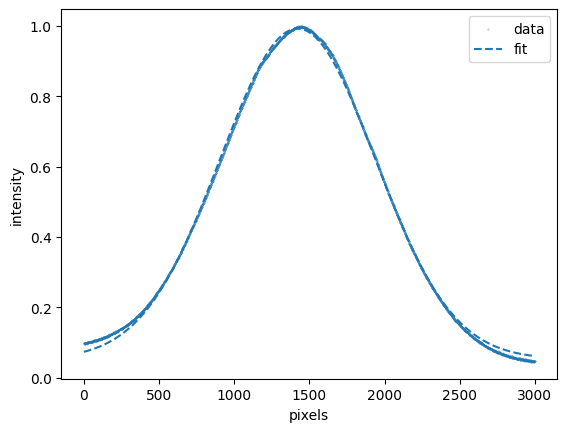

y waist = 3554.43 microns


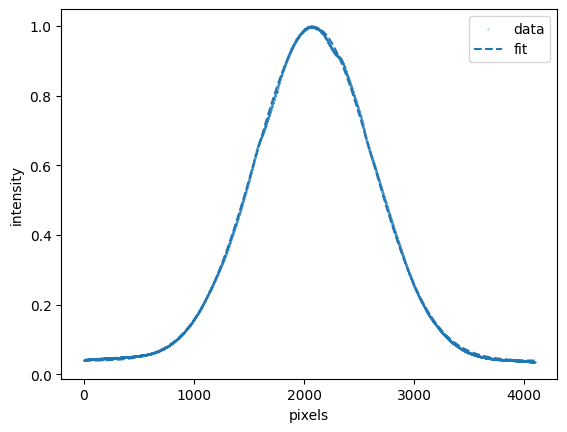

x waist = 3664.65 microns


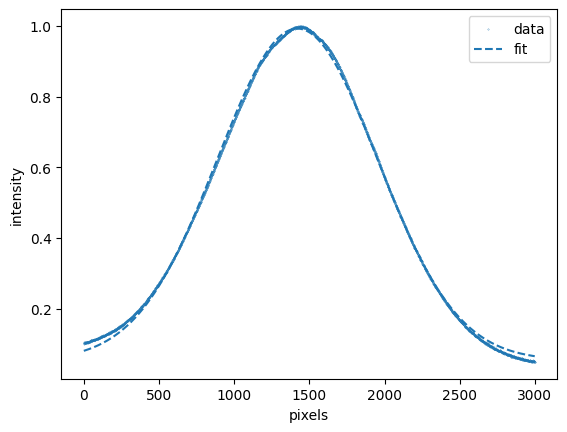

y waist = 3672.72 microns


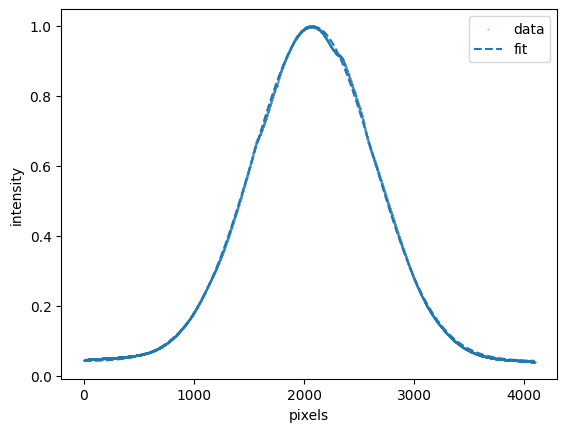

x waist = 3797.50 microns


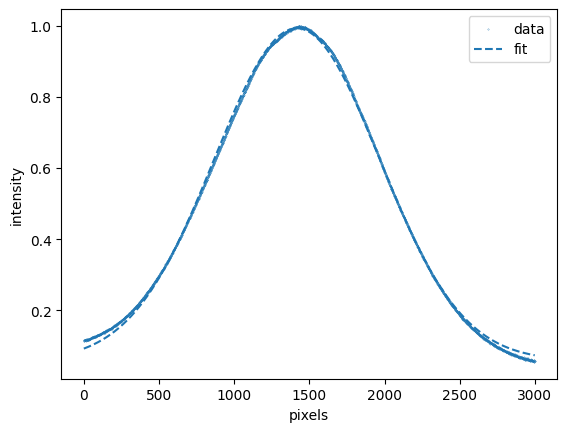

y waist = 3793.66 microns


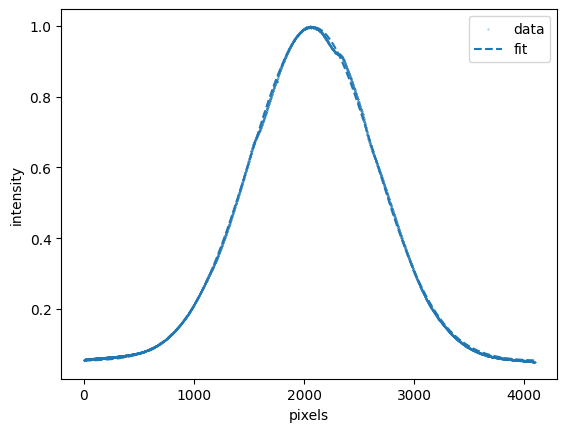

x waist = 3926.85 microns


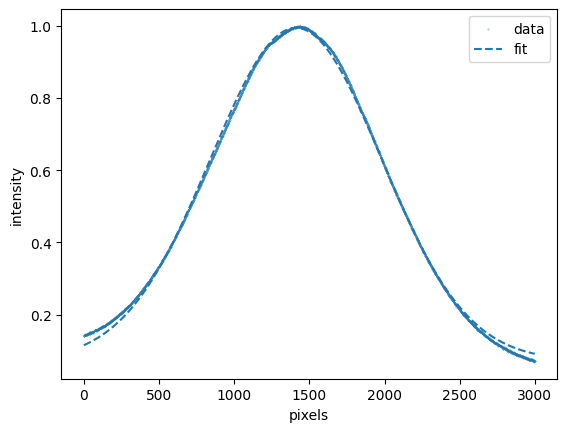

y waist = 3926.48 microns


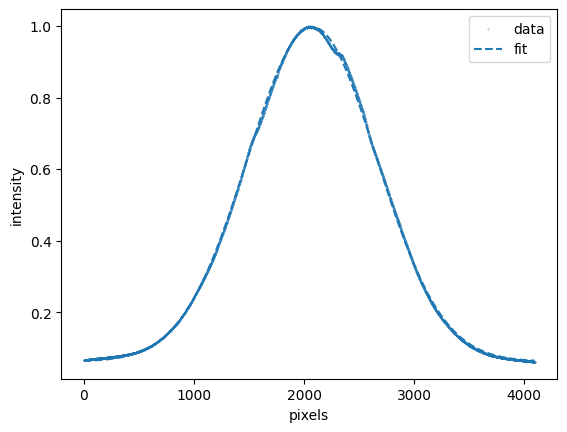

x waist = 4057.77 microns


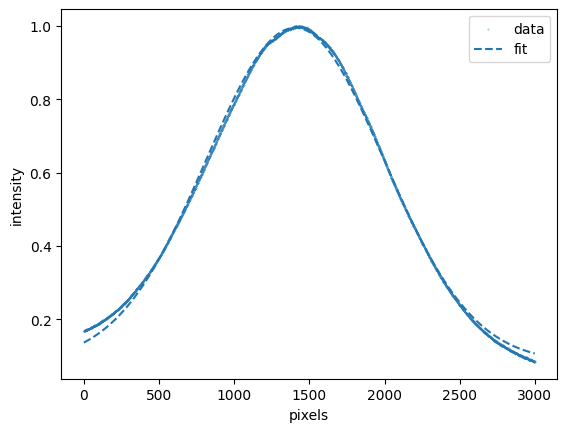

y waist = 4070.06 microns


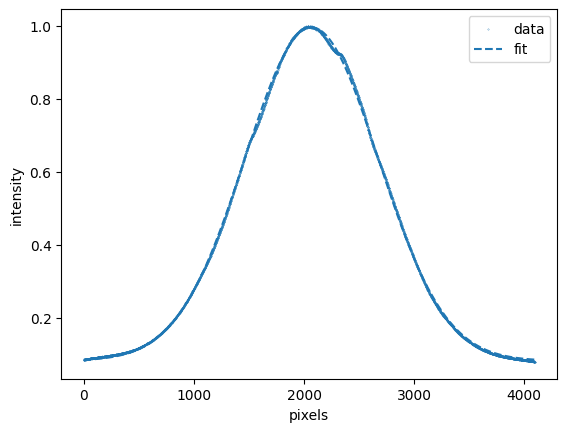

x waist = 4181.73 microns


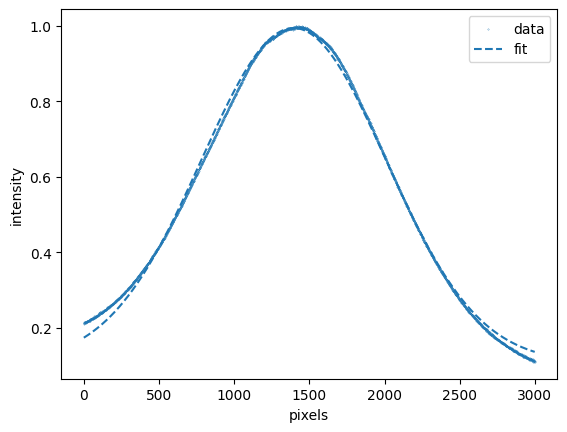

y waist = 4233.04 microns


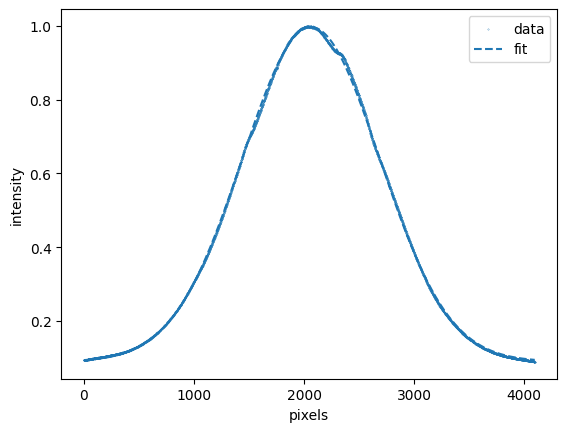

x waist = 4309.59 microns


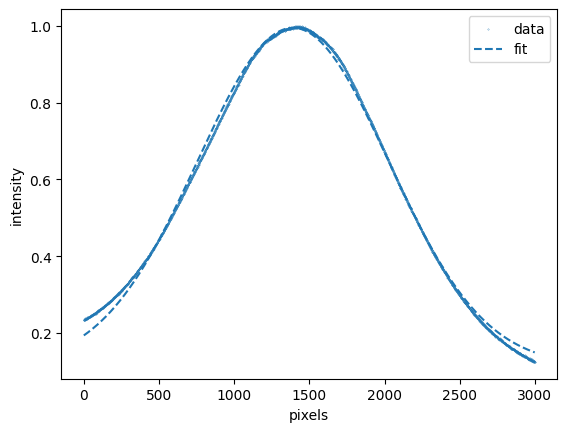

y waist = 4380.73 microns


In [56]:
um_per_pixel = 3.45 # for BFS-U3-122S6M-C

files = [f'{i}mm.bmp' for i in range(10)]

xwaists = []
ywaists = []

for file in files:
    img = Image.open(os.path.join('data','LMA-PM-15 NA measurements',file))
    rows = np.array(img, dtype=float)
    
    xproj = np.sum(rows, axis=0)
    xproj /= max(xproj)
    yproj = np.sum(rows, axis=1)
    yproj /= max(yproj)
    
    xpts = np.arange(len(xproj))
    ypts = np.arange(len(yproj))
    
    gaussian_beam = lambda x, x0, w0, a, b: a*np.exp(-2*(x-x0)**2/w0**2) + b
    
    # x fit
    bounds = [
        [xpts[0], 50,  0.7, 0], # mins
        [xpts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=xpts, ydata=xproj, bounds=bounds)
    
    plt.scatter(xpts, xproj,label='data', s=0.05)
    plt.plot(xpts, gaussian_beam(xpts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()

    wx = popt[1]*um_per_pixel
    xwaists.append(wx)
    print(f"x waist = {wx:.2f} microns")
    
    # y fit
    bounds = [
        [ypts[0], 50,  0.7, 0], # mins
        [ypts[-1],3000, 1.1, 0.2] # max
    ]
    
    popt, pcov = curve_fit(f=gaussian_beam, xdata=ypts, ydata=yproj, bounds=bounds)
    
    plt.scatter(ypts, yproj,label='data',s=0.05)
    plt.plot(ypts, gaussian_beam(ypts, *popt), label='fit', ls='--')
    plt.xlabel('pixels')
    plt.ylabel('intensity')
    plt.legend()
    plt.show()
    wy = popt[1]*um_per_pixel
    ywaists.append(wy)
    print(f"y waist = {wy:.2f} microns")

In [57]:
[float(x) for x in xwaists]

[3175.3670455068936,
 3271.2917534466333,
 3400.47906158792,
 3530.8183284114007,
 3664.6530039758677,
 3797.5008616919285,
 3926.8538859059304,
 4057.7692141964867,
 4181.731770463938,
 4309.585323840279]

In [58]:
[float(y) for y in xwaists]

[3175.3670455068936,
 3271.2917534466333,
 3400.47906158792,
 3530.8183284114007,
 3664.6530039758677,
 3797.5008616919285,
 3926.8538859059304,
 4057.7692141964867,
 4181.731770463938,
 4309.585323840279]

In [59]:
xwaists[1] - xwaists[0]

np.float64(95.92470793973962)

In [72]:
xwaists = np.array(xwaists)
ywaists = np.array(ywaists)

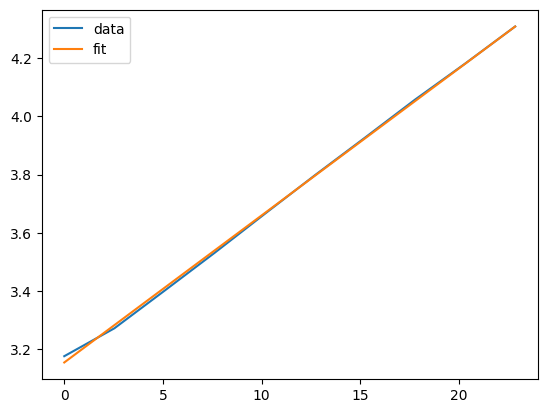

[0.05055703 3.15373821]


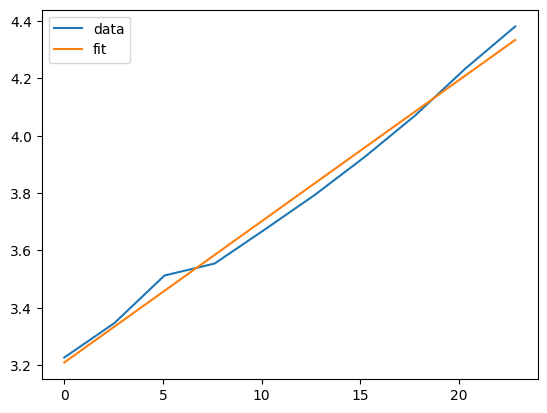

[0.0491786  3.20965783]


In [78]:
mm_pts = np.array(range(10))*0.1*25.4
plt.plot(mm_pts, xwaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=xwaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

plt.plot(mm_pts, ywaists/1000.0,label='data')
model = lambda x, m, b: m*x + b
popt, _ = curve_fit(f=model, xdata=mm_pts, ydata=ywaists/1000.0)
plt.plot(mm_pts, model(mm_pts, *popt), label='fit')
plt.legend()
plt.show()
print(popt)

In [79]:
# MFD of fiber:
NA = 0.05
2*8.5e-7/(np.pi*NA)

1.0822536130248883e-05